# nnU-Net Workshop 

(modified AL 2022-11-27)

The nnU-Net is a toolkit to segment imaging data and was specifically designed for biomedical data.

It was designed by **Fabian Isensee** while pursuing his PhD at the [Medical Image Computing Division of the German Cancer Research Institute](https://www.dkfz.de/en/mic/index.php).

More information about nnU-Net, as well as the installataion guide on your own workstation can be found on:
- Isensee, F., Jaeger, P. F., Kohl, S. A. A., Petersen, J. & Maier-Hein, K. H. [nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation](http://www.nature.com/articles/s41592-020-01008-z). Nat Methods 18, 203–211 (2021).
- [nnU-Net GitHub Page](https://github.com/MIC-DKFZ/nnUNet)



## What is this Workshop all about?

The goal of this workshop is to allow end-users to understand in how to use nnU-Net for their own applications.

It includes initial setup and how to use nnU-Net in the Google Colab environment. 
Some steps are only needed for GoogleColab and will be explained, while others are generally applicable. 

Further it is advised to visualize the data with segmentations using the [MITK-Workbench](https://www.mitk.org/wiki/The_Medical_Imaging_Interaction_Toolkit_(MITK)), which is also developed in the Medical Image Computing Division of the German Cancer Research Institute - at least this is what we advocate.

- [MITK Workbench Download Link](https://www.mitk.org/wiki/Downloads)

### Requirements for Google Colab 
1. Google Account
   1. At least 4GB of free disk space
2. Visualization tool for volumetric data, we advise to use MITK.

### Some notes about the Workshop

This workshop was created by **Carsten Lüth**, a PhD student in the [Interactive Machine Learning Research Group](https://www.dkfz.de/en/interaktives-maschinelles-lernen/index.php) headed by Dr. Paul F. Jäger.

If you happen to find this workshop in any way useful, please share this version of it:
- [https://github.com/IML-DKFZ/nnunet-workshop](https://github.com/IML-DKFZ/nnunet-workshop)

## Further information

Further Information about nnU-Net is presented in the following lectures:
- [Lecture by Paul F. Jäger](https://www.youtube.com/watch?v=3po8qVzz5Tc&t=2196s)
- [Lecture by Fabian Isensee](https://www.youtube.com/watch?v=C6tpnJRpt90)

### MITK with nnU-Net
MITK has a new experimental feature which uses pretrained nnU-Net models as a segmentation tool.
This feature has been added since its release of version 2022.04.
For further information about this we refer to the [MITK Documentation](https://docs.mitk.org/2022.04/org_mitk_views_segmentation.html#org_mitk_views_segmentationnnUNetTool).


**Notes**:
- quite some time was spent to optimize the way of downloading and unpacking the data. I did not get to run it at all when automated... If you have any idea how to do this better (and show that it works I would greatly appreciate this!)

# 1. Import Packages for Google Colab

In [1]:
# Import basic packages for later use
import os
import shutil
from collections import OrderedDict

import json
import matplotlib.pyplot as plt
import nibabel as nib

import numpy as np
import torch

In [2]:
# check whether GPU accelerated computing is available
assert torch.cuda.is_available() # if there is an error here, enable GPU in the Runtime

In [3]:
torch.__version__

'1.13.0+cu117'

In [4]:
import torchvision
torchvision.__version__

'0.14.0+cu117'

In [5]:
!nvidia-smi

Sun Nov 27 18:15:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.141.03   Driver Version: 470.141.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro RTX 6000     Off  | 00000000:65:00.0  On |                  Off |
| 33%   27C    P8    27W / 260W |    412MiB / 24197MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory, as that makes some difference for the code below.
# We'll do this in every notebook of the course.
if 'google.colab' in str(get_ipython()):
    print('The notebook is running on Colab. colab=True.')
    colab=True
else:
    print('The notebook is not running on Colab. colab=False.')
    colab=False

The notebook is not running on Colab. colab=False.


# 2. Installing nnU-Net

In [7]:
# due to problems with the dataset with newest simple ITK version preinstall a special version
# for more information about this see: https://github.com/MIC-DKFZ/nnUNet/issues/756

if colab:
    !pip install SimpleITK==2.0.2
else:
    import SimpleITK as sitk
    print(f"SimpleITK version: {sitk.__version__}")

SimpleITK version: 2.2.0


In [8]:
# install nnunet - yes it is that easy
if colab:
    !pip install nnunet 

**Note**: you do not have to restart the Runtime even when the following error appears, this is simply due to a reinstallation of a package - so no worries. 


```
WARNING: The following packages were previously imported in this runtime:

[argparse]

You must restart the runtime in order to use newly installed versions.
```

# 3. Verifying installation of nn-Unet

In [9]:
# check if nnunet can be imported
import nnunet



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet



You should read the following if the installation was successful:


```
Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

```



## 3.1 Installation and initialization of Weights&Biases (non-mandatory)
This is a package which allows you to easily visualize metrics during your training.

We will use this here to get access to System Information (GPU utilization etc.)when running on Google Colab - however it is also useful to use at a local workstation.

To use Weights&Biases you will need an account.
This can be created at https://wandb.ai

During the initialization with ```wandb.init()``` it will ask you for an API key, which you can obtain from:
https://wandb.ai/settings 
under API keys

In [10]:
if colab:
    !pip install wandb
else:
    # !pip install wandb (See above)
    import wandb
    print(f"wandb version: {wandb.__version__}")


wandb version: 0.13.5


In [11]:
import wandb
wandb.init(project="Isensee-nnUNet")

wandb: Currently logged in as: arvidl. Use `wandb login --relogin` to force relogin


### 3.2 Installation of GDOWN (only for in-person workshops)
GDown allows to download files from GoogleDrive with Python.
Therefore it is used for in-person workshops.

In [12]:
# install gdown to download files from GoogleDrive
if colab:
    !pip install gdown

# 4. Connect Google Colab with GoogleDrive
This is heavily encouraged when using Google Colab, otherwise loading, accessing and saving of data checkpoints etc. is just much harder (if not impossible).

**Note**:
When ```drive.mount()``` is executed, there will appear a popup window, which will ask you which Google Account should be connected and then for permission regarding Colab accessing your GoogleDrive.

There can be some problems at this step, for me the solution was to Download the GoogleDrive Application.
You can download it from: https://www.google.com/drive/download/


If there are any problems at this stage, feel free to contact me (during the workshop).

In [13]:
# for colab users only - mounting the drive

if colab:
    !pip install gdown
    from google.colab import drive
    drive.mount('/content/drive',force_remount = True)
    
    drive_dir = "/content/drive/My Drive"
    mount_dir = os.path.join(drive_dir, "Colab Notebooks")
    base_dir = os.getcwd()

In [14]:
if colab:
    assert os.path.exists(drive_dir) # if this fails, something went wrong with mounting GoogleDrive
    if os.path.exists(mount_dir) is False:
        os.makedirs(mount_dir)

# 5. Setting up nnU-Nets folder structure and environment variables
nnUnet expects a certain folder structure and environment variables. 

Roughly they tell nnUnet:
1. Where to look for stuff
2. Where to put stuff

For more information about this please check: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/setting_up_paths.md

In [15]:
if colab:
    def make_if_dont_exist(folder_path,overwrite=False):
        """
        creates a folder if it does not exists
        input: 
        folder_path : relative path of the folder which needs to be created
        over_write :(default: False) if True overwrite the existing folder 
        """
        if os.path.exists(folder_path):
        
            if not overwrite:
                print(f"{folder_path} exists.")
            else:
                print(f"{folder_path} overwritten")
                shutil.rmtree(folder_path)
                os.makedirs(folder_path)

        else:
            os.makedirs(folder_path)
            print(f"{folder_path} created!")

## 5.1 Set environment Variables and creating folders

In [16]:
if colab:
    # Maybe move path of preprocessed data directly on content - this may be signifcantely faster!
    print("Current Working Directory {}".format(os.getcwd()))
    path_dict = {
        "nnUNet_raw_data_base" : os.path.join(mount_dir, "nnUNet_raw_data_base"), 
        "nnUNet_preprocessed" : os.path.join(mount_dir, "nnUNet_preprocessed"), # 1 experiment: 1 epoch took 112s
        # "nnUNet_preprocessed" : os.path.join(base_dir, "nnUNet_preprocessed"), # 1 experiment: 1 epoch took 108s -> seems faster take this
        "RESULTS_FOLDER" : os.path.join(mount_dir, "nnUNet_Results_Folder"),
        "RAW_DATA_PATH" : os.path.join(mount_dir, "RawData"), # This is used here only for convenience (not necessary for nnU-Net)!
    }

    # Write paths to environment variables
    for env_var, path in path_dict.items():
        os.environ[env_var] = path 

    # Check whether all environment variables are set correct!
    for env_var, path in path_dict.items():
        if os.getenv(env_var) != path:
            print("Error:")
            print("Environment Variable {} is not set correctly!".format(env_var))
            print("Should be {}".format(path))
            print("Variable is {}".format(os.getenv(env_var)))
        make_if_dont_exist(path, overwrite=False)

    print("If No Error Occured Continue Forward. =)")

# 6. Using nnU-Net on Medical Decathlon tasks
To get us started and also verify that nnU-Net works properly on our system, we will now run a training with nnU-Net and then make some predictions.

This will be done on parts of the Medical Decathlon Dataset, because everything is already nicely set up for these datasets.

Also for these two tasks there exist pre-written scripts, automatically unpacking and preparing the data for nnU-Net to use.

For this we will follow the two examples given in the nnU-Net repository for:
- [Training on Task004 Hippocampus Dataset](https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/training_example_Hippocampus.md)
- [Run Inference on Task005 Prostate Dataset](https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/inference_example_Prostate.md)

Bottom Line:
If something goes wrong here, it is worth to check whether anything went wrong before these steps! 

## 6.1 Downloading the Data
Download the data, unpack it and put it in the proper folder.
Generally, you will then have to download and move the files to the correct folder yourself.

Link to official [GoogleDrive](https://drive.google.com/drive/folders/1HqEgzS8BV2c7xYNrZdEAnrHk7osJJ--2) for the download.

If you are doing this by hand - skip the two next cells!

### 6.1.1 Downloading the Data for in-person workshops
For in person workshops, this will be automated and I host the data from GoogleDrive.
This is due to time constraints of this workshop and I will take the links down later!

In [17]:
if colab:
    # only for in person workshops

    # Download the data with gdown

    os.chdir(path_dict["RAW_DATA_PATH"])
    # Download the Hippocampus Dataset
    !gdown 'https://drive.google.com/uc?export=download&id=1L-22VV6J8O6afTSOQuQKFiH-tblxb_TW'

    # Download the Prostate Dataset
    !gdown  'https://drive.google.com/uc?export=download&id=1L-4D5szfpo7eO639TBmnukw9y_X9h5Yc'
    os.chdir(base_dir)

    print("Data should be located in folder: {}".format(path_dict["RAW_DATA_PATH"]))
    assert os.path.isfile(os.path.join(path_dict["RAW_DATA_PATH"], "Task04_Hippocampus.zip")) # check whether the file is correctly downloaded
    assert os.path.isfile(os.path.join(path_dict["RAW_DATA_PATH"], "Task05_Prostate.zip")) # check whether the file is correctly downloaded


In [18]:
if colab:
    # only for in person workshops

    # unzip the files in the folder
    os.chdir(path_dict["RAW_DATA_PATH"])
    !unzip Task04_Hippocampus.zip
    !unzip Task05_Prostate.zip
    os.chdir(base_dir)

### 6.1.2 Verification of data
Here we test, wether the data is saved in the correct folder structure.

In [19]:
if colab:
    print("Data should be located in folder: {}".format(path_dict["RAW_DATA_PATH"]))
    assert os.path.exists(os.path.join(path_dict["RAW_DATA_PATH"], "Task04_Hippocampus")) # check whether the file is correctly downloaded
    assert os.path.exists(os.path.join(path_dict["RAW_DATA_PATH"], "Task05_Prostate")) # check whether the file is correctly downloaded
else:
    RAW_DATA_PATH = f"{os.environ['nnUNet_raw_data_base']}/nnUNet_raw_data"
    print("Data should be located in folder: {}".format(RAW_DATA_PATH))

    assert os.path.exists(os.path.join(RAW_DATA_PATH, "Task04_Hippocampus")) # check whether the file is correctly downloaded
    assert os.path.exists(os.path.join(RAW_DATA_PATH, "Task05_Prostate")) # check whether the file is correctly downloaded


Data should be located in folder: /media/arvid/ssd1tb/prj/nnUNet/nnUNet_raw_data_base/nnUNet_raw_data


## 6.2 Training nnU-Net on the Decathlon Task004 Hippocampus
For this we will use already pre-existing scripts for handling the data.

### 6.2.1 Dataset Conversion
The Decathlon datasets are 4D nifti files, for nnU-Net they have to be converted to 3D nifti files.

For more information about dataset conversion see: [nnU-Net Dataset Conversion](https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/dataset_conversion.md)

In [20]:
task = f"{RAW_DATA_PATH}/Task04_Hippocampus"
print(f"task: {task}")

task: /media/arvid/ssd1tb/prj/nnUNet/nnUNet_raw_data_base/nnUNet_raw_data/Task04_Hippocampus


In [21]:
!nnUNet_convert_decathlon_task -h



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

usage: nnUNet_convert_decathlon_task [-h] -i I [-p P]
                                     [-output_task_id OUTPUT_TASK_ID]

The MSD provides data as 4D Niftis with the modality being the first
dimension. We think this may be cumbersome for some users and therefore expect
3D niftixs instead, with one file per modality. This utility will convert 4D
MSD data into the format nnU-Net expects

optional arguments:
  -h, --help            show this help message and exit
  -i I                  Input folder. Must point to a TaskXX_TASKNAME folder
                        as downloaded from the MSD website
  -p P                  Use this t

In [22]:
%%bash -s $task

nnUNet_convert_decathlon_task -i $1



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet



## 6.2.2 Extracting Rule Based Parameters
This will preprocess the dataset to allow fast training and saves it into the "nnUNet_preprocessed" folder.
Further rule based parameters will be extracted in the planning step.


From https://stackoverflow.com/questions/43288550/iopub-data-rate-exceeded-in-jupyter-notebook-when-viewing-image<br>
If you get the warning message:

```
IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.


Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
```
try:
```
yourTerminal:prompt> jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10 
```

In [23]:
%%bash
# Prepare the Execution of nnU-Net for Task 4 - this is the Hippocampus Dataset here (taking 1-2 minutes)
nnUNet_plan_and_preprocess -t 4



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

hippocampus_150
hippocampus_050
hippocampus_105
hippocampus_178
hippocampus_166
hippocampus_017
hippocampus_109
hippocampus_074
hippocampus_174
hippocampus_084
hippocampus_233
hippocampus_184
hippocampus_333
hippocampus_250
hippocampus_350
hippocampus_378
hippocampus_205
hippocampus_305
hippocampus_149
hippocampus_057
hippocampus_157
hippocampus_102
hippocampus_161
hippocampus_173
hippocampus_370
hippocampus_301
hippocampus_180
hippocampus_189
hippocampus_243
hippocampus_343
hippocampus_220
hippocampus_097
hippocampus_320
hippocampus_197
hippocampus_351
hippocampus_251
hippocampus_245
hippocampus_345
hippocampus_238
hippocampus_33

no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 34, 48, 37)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 34, 48, 37)} 

1 1515
2 1375
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_preprocessed/Task004_Hippocampus/nnUNetData_plans_v2.1_stage0/hippocampus_098.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 27, 52, 33)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 27, 52, 33)} 

1 1252
2 1283
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_preprocessed/Task004_Hippocampus/nnUNetData_plans_v2.1_stage0/hippocampus_099.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is tra

after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 36, 49, 36)} 

1 1589
2 1630
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_preprocessed/Task004_Hippocampus/nnUNetData_plans_v2.1_stage0/hippocampus_109.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 39, 50, 38)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 39, 50, 38)} 

1 2459
2 1245
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_preprocessed/Task004_Hippocampus/nnUNetData_plans_v2.1_stage0/hippocampus_114.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 38, 53, 32)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 38, 53, 32)} 

1 1712
2 1517
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_p

no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 38, 48, 33)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 38, 48, 33)} 

1 1855
2 1568
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_preprocessed/Task004_Hippocampus/nnUNetData_plans_v2.1_stage0/hippocampus_033.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 40, 49, 36)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 40, 49, 36)} 

1 1830
2 1545
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_preprocessed/Task004_Hippocampus/nnUNetData_plans_v2.1_stage0/hippocampus_034.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is tra

after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 40, 50, 39)} 

1 2017
2 1605
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_preprocessed/Task004_Hippocampus/nnUNetData_plans_v2.1_stage0/hippocampus_014.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 28, 51, 42)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 28, 51, 42)} 

1 1511
2 1308
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_preprocessed/Task004_Hippocampus/nnUNetData_plans_v2.1_stage0/hippocampus_015.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 41, 55, 35)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 41, 55, 35)} 

1 1606
2 1531
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_p

no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 33, 48, 38)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 33, 48, 38)} 

1 1692
2 1528
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_preprocessed/Task004_Hippocampus/nnUNetData_plans_v2.1_stage0/hippocampus_044.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 34, 49, 37)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 34, 49, 37)} 

1 1605
2 1483
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_preprocessed/Task004_Hippocampus/nnUNetData_plans_v2.1_stage0/hippocampus_150.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is tra

after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 29, 51, 36)} 

1 1389
2 1672
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_preprocessed/Task004_Hippocampus/nnUNetData_plans_v2.1_stage0/hippocampus_091.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 37, 51, 38)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 37, 51, 38)} 

1 1800
2 1620
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_preprocessed/Task004_Hippocampus/nnUNetData_plans_v2.1_stage0/hippocampus_162.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 44, 47, 36)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 44, 47, 36)} 

1 1569
2 1934
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_p

no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 39, 45, 37)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 39, 45, 37)} 

1 1538
2 1292
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_preprocessed/Task004_Hippocampus/nnUNetData_plans_v2.1_stage0/hippocampus_219.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 40, 45, 39)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 40, 45, 39)} 

1 1850
2 1080
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_preprocessed/Task004_Hippocampus/nnUNetData_plans_v2.1_stage0/hippocampus_220.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is tra

after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 38, 49, 34)} 

1 1526
2 1301
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_preprocessed/Task004_Hippocampus/nnUNetData_plans_v2.1_stage0/hippocampus_203.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 39, 48, 36)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 39, 48, 36)} 

1 1642
2 1231
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_preprocessed/Task004_Hippocampus/nnUNetData_plans_v2.1_stage0/hippocampus_204.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 32, 47, 32)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 32, 47, 32)} 

1 1314
2 1390
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_p

no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 36, 50, 31)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 36, 50, 31)} 

1 1595
2 1865
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_preprocessed/Task004_Hippocampus/nnUNetData_plans_v2.1_stage0/hippocampus_301.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 39, 46, 35)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 39, 46, 35)} 

1 2209
2 1647
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_preprocessed/Task004_Hippocampus/nnUNetData_plans_v2.1_stage0/hippocampus_302.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is tra


1 1937
2 1738
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_preprocessed/Task004_Hippocampus/nnUNetData_plans_v2.1_stage0/hippocampus_329.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 33, 55, 35)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 33, 55, 35)} 

1 2232
2 1765
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_preprocessed/Task004_Hippocampus/nnUNetData_plans_v2.1_stage0/hippocampus_330.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 33, 52, 35)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 33, 52, 35)} 

1 1561
2 1633
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_preprocessed/Task004_Hippocampus/nnUNetData_plans_v2.1_stage0/hippocampus_331.npz
{'spacing': 

after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 38, 46, 33)} 

1 1192
2 1443
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_preprocessed/Task004_Hippocampus/nnUNetData_plans_v2.1_stage0/hippocampus_333.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 36, 47, 34)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 36, 47, 34)} 

1 1242
2 1436
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_preprocessed/Task004_Hippocampus/nnUNetData_plans_v2.1_stage0/hippocampus_334.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 41, 47, 32)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 41, 47, 32)} 

1 1263
2 1269
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_p

no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 33, 50, 36)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 33, 50, 36)} 

1 1733
2 1372
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_preprocessed/Task004_Hippocampus/nnUNetData_plans_v2.1_stage0/hippocampus_361.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 35, 52, 38)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 35, 52, 38)} 

1 1838
2 1668
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_preprocessed/Task004_Hippocampus/nnUNetData_plans_v2.1_stage0/hippocampus_363.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is tra


1 1415
2 1340
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_preprocessed/Task004_Hippocampus/nnUNetData_plans_v2.1_stage0/hippocampus_353.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 32, 50, 36)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 32, 50, 36)} 

1 1529
2 1383
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_preprocessed/Task004_Hippocampus/nnUNetData_plans_v2.1_stage0/hippocampus_354.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 38, 47, 33)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 38, 47, 33)} 

1 1819
2 1516
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_preprocessed/Task004_Hippocampus/nnUNetData_plans_v2.1_stage0/hippocampus_355.npz
{'spacing': 

the median shape of the dataset is  [36. 50. 35.]
the max shape in the dataset is  [47. 59. 43.]
the min shape in the dataset is  [24. 40. 31.]
we don't want feature maps smaller than  4  in the bottleneck
the transposed median shape of the dataset is  [36. 50. 35.]
[{'batch_size': 366, 'num_pool_per_axis': [3, 3], 'patch_size': array([56, 40]), 'median_patient_size_in_voxels': array([36, 50, 35]), 'current_spacing': array([1., 1., 1.]), 'original_spacing': array([1., 1., 1.]), 'pool_op_kernel_sizes': [[2, 2], [2, 2], [2, 2]], 'conv_kernel_sizes': [[3, 3], [3, 3], [3, 3], [3, 3]], 'do_dummy_2D_data_aug': False}]
Initializing to run preprocessing
npz folder: /media/arvid/ssd1tb/prj/nnUNet/nnUNet_raw_data_base/nnUNet_cropped_data/Task004_Hippocampus
output_folder: /media/arvid/ssd1tb/prj/nnUNet/nnUNet_preprocessed/Task004_Hippocampus
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is tra

no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 32, 48, 34)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 32, 48, 34)} 

normalization...
normalization done
1 1689
2 1256
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_preprocessed/Task004_Hippocampus/nnUNetData_plans_v2.1_2D_stage0/hippocampus_148.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 32, 49, 33)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 32, 49, 33)} 

normalization...
normalization done
1 1620
2 1523
saving:  no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 41, 47, 32)} 
after:  {'spacin

no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 26, 51, 34)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 26, 51, 34)} 

normalization...
normalization done
1 1682
2 1464
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_preprocessed/Task004_Hippocampus/nnUNetData_plans_v2.1_2D_stage0/hippocampus_160.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 36, 51, 35)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 36, 51, 35)} 

normalization...
normalization done
1 1775
2 1942
saving:  no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 35, 51, 35)} 
after:  {'spacing': array([1., 1., 1.]),

before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 38, 49, 32)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 38, 49, 32)} 

normalization...
normalization done
1 1363
2 1266
saving:  /media/arvid/ssd1tb/prj/nnUNet/nnUNet_preprocessed/Task004_Hippocampus/nnUNetData_plans_v2.1_2D_stage0/hippocampus_135.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 41, 49, 34)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 41, 49, 34)} 

normalization...
normalization done
1 1445
2 1368
saving:  no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 37, 47, 35)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is re

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### 6.2.3 Training nnU-Net
here we will train a 3D nnU-Net on Full Resolution for 2 epochs.

To run a normal training use: ```nnUNetTrainerV2``` instead of ```nnUNetTrainerV2_2epochs```

In [24]:
%%time
# train the 3d nnUnet on the Full Resolution with Task 4 and Cross Validation Split 0
!nnUNet_train 3d_fullres nnUNetTrainerV2_2epochs 4 0

# training the Full Model will take quite a while - therefore it is advised to interrupt the training after some time



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

###############################################
I am running the following nnUNet: 3d_fullres
My trainer class is:  <class 'nnunet.training.network_training.nnUNet_variants.benchmarking.nnUNetTrainerV2_2epochs.nnUNetTrainerV2_2epochs'>
For that I will be using the following configuration:
num_classes:  2
modalities:  {0: 'MRI'}
use_mask_for_norm OrderedDict([(0, False)])
keep_only_largest_region None
min_region_size_per_class None
min_size_per_class None
normalization_schemes OrderedDict([(0, 'nonCT')])
stages...

stage:  0
{'batch_size': 9, 'num_pool_per_axis': [3, 3, 3], 'patch_size': array([40, 56, 40]), 'median_patient_size_in

2022-11-27 18:16:16.847933: train loss : -0.3256
2022-11-27 18:16:17.846839: validation loss: -0.7603
2022-11-27 18:16:17.847240: Average global foreground Dice: [0.8304, 0.8261]
2022-11-27 18:16:17.847411: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 18:16:18.148060: lr: 0.005359
2022-11-27 18:16:18.148168: This epoch took 17.335112 s

2022-11-27 18:16:18.148202: 
epoch:  1
2022-11-27 18:16:31.962916: train loss : -0.7655
2022-11-27 18:16:32.949237: validation loss: -0.8072
2022-11-27 18:16:32.949570: Average global foreground Dice: [0.8646, 0.8518]
2022-11-27 18:16:32.949633: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 18:16:33.287308: lr: 0.0
2022-11-27 18:16:33.287433: This epoch took 15.139205 s

CPU times: user 822 ms, sys: 164 ms, total: 987 ms
Wall time: 39.7 s


In [25]:
%%time
# train the 3d nnUnet on the Full Resolution with Task 4 and Cross Validation Split 5
!nnUNet_train 3d_fullres nnUNetTrainerV2_2epochs 4 5



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

###############################################
I am running the following nnUNet: 3d_fullres
My trainer class is:  <class 'nnunet.training.network_training.nnUNet_variants.benchmarking.nnUNetTrainerV2_2epochs.nnUNetTrainerV2_2epochs'>
For that I will be using the following configuration:
num_classes:  2
modalities:  {0: 'MRI'}
use_mask_for_norm OrderedDict([(0, False)])
keep_only_largest_region None
min_region_size_per_class None
min_size_per_class None
normalization_schemes OrderedDict([(0, 'nonCT')])
stages...

stage:  0
{'batch_size': 9, 'num_pool_per_axis': [3, 3, 3], 'patch_size': array([40, 56, 40]), 'median_patient_size_in

2022-11-27 18:17:22.692904: train loss : -0.3435
2022-11-27 18:17:23.655557: validation loss: -0.7734
2022-11-27 18:17:23.655916: Average global foreground Dice: [0.8352, 0.8282]
2022-11-27 18:17:23.655993: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 18:17:23.950674: lr: 0.005359
2022-11-27 18:17:23.950794: This epoch took 17.151290 s

2022-11-27 18:17:23.950829: 
epoch:  1
2022-11-27 18:17:37.816166: train loss : -0.7672
2022-11-27 18:17:38.787227: validation loss: -0.8030
2022-11-27 18:17:38.787559: Average global foreground Dice: [0.859, 0.8438]
2022-11-27 18:17:38.787620: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 18:17:39.155139: lr: 0.0
2022-11-27 18:17:39.155268: This epoch took 15.204412 s

CPU times: user 799 ms, sys: 129 ms, total: 928 ms
Wall time: 39.6 s


In [27]:
%%time
# train the 3d nnUnet on the Full Resolution with Task 4, Normal training and Cross Validation Split 5
!nnUNet_train 3d_fullres nnUNetTrainerV2 4 5



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

###############################################
I am running the following nnUNet: 3d_fullres
My trainer class is:  <class 'nnunet.training.network_training.nnUNetTrainerV2.nnUNetTrainerV2'>
For that I will be using the following configuration:
num_classes:  2
modalities:  {0: 'MRI'}
use_mask_for_norm OrderedDict([(0, False)])
keep_only_largest_region None
min_region_size_per_class None
min_size_per_class None
normalization_schemes OrderedDict([(0, 'nonCT')])
stages...

stage:  0
{'batch_size': 9, 'num_pool_per_axis': [3, 3, 3], 'patch_size': array([40, 56, 40]), 'median_patient_size_in_voxels': array([36, 50, 35]), 'current_spaci

2022-11-27 18:22:07.288141: train loss : -0.3374
2022-11-27 18:22:08.296944: validation loss: -0.7432
2022-11-27 18:22:08.297430: Average global foreground Dice: [0.8286, 0.8181]
2022-11-27 18:22:08.297539: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 18:22:08.593130: lr: 0.009991
2022-11-27 18:22:08.593246: This epoch took 17.411450 s

2022-11-27 18:22:08.593287: 
epoch:  1
2022-11-27 18:22:22.225094: train loss : -0.7709
2022-11-27 18:22:23.227793: validation loss: -0.8064
2022-11-27 18:22:23.228387: Average global foreground Dice: [0.8658, 0.8451]
2022-11-27 18:22:23.228457: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 18:22:23.571707: lr: 0.009982
2022-11-27 18:22:23.575788: saving checkpoint...
2022-11-27 18:22:23.615697: done, saving took 0.04 seconds
2022-11-27 18:22:23.617497: This epoch took 15.024061 s

2022-11-27 18:22:23.617559: 
epoch:  2
2022-11-27 18:22:37.3705

2022-11-27 18:26:03.116805: lr: 0.009856
2022-11-27 18:26:03.120856: saving checkpoint...
2022-11-27 18:26:03.179607: done, saving took 0.06 seconds
2022-11-27 18:26:03.182980: This epoch took 15.858821 s

2022-11-27 18:26:03.183051: 
epoch:  16
2022-11-27 18:26:17.620273: train loss : -0.8519
2022-11-27 18:26:18.627231: validation loss: -0.8443
2022-11-27 18:26:18.627556: Average global foreground Dice: [0.8924, 0.8727]
2022-11-27 18:26:18.627614: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 18:26:18.970357: lr: 0.009847
2022-11-27 18:26:18.974536: saving checkpoint...
2022-11-27 18:26:19.039243: done, saving took 0.07 seconds
2022-11-27 18:26:19.041223: This epoch took 15.858141 s

2022-11-27 18:26:19.041281: 
epoch:  17
2022-11-27 18:26:33.435211: train loss : -0.8529
2022-11-27 18:26:34.443187: validation loss: -0.8479
2022-11-27 18:26:34.443566: Average global foreground Dice: [0.8939, 0.8765]
2022-11-27 18:26:34.443641: (int

2022-11-27 18:30:01.135885: done, saving took 0.06 seconds
2022-11-27 18:30:01.137800: This epoch took 15.693958 s

2022-11-27 18:30:01.137870: 
epoch:  31
2022-11-27 18:30:15.337688: train loss : -0.8661
2022-11-27 18:30:16.338706: validation loss: -0.8452
2022-11-27 18:30:16.339033: Average global foreground Dice: [0.8916, 0.8747]
2022-11-27 18:30:16.339088: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 18:30:16.747509: lr: 0.009712
2022-11-27 18:30:16.751483: saving checkpoint...
2022-11-27 18:30:16.811215: done, saving took 0.06 seconds
2022-11-27 18:30:16.813140: This epoch took 15.675233 s

2022-11-27 18:30:16.813194: 
epoch:  32
2022-11-27 18:30:31.074351: train loss : -0.8648
2022-11-27 18:30:32.076210: validation loss: -0.8550
2022-11-27 18:30:32.076543: Average global foreground Dice: [0.8984, 0.882]
2022-11-27 18:30:32.076599: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-

2022-11-27 18:34:11.685046: lr: 0.009576
2022-11-27 18:34:11.689146: saving checkpoint...
2022-11-27 18:34:11.747655: done, saving took 0.06 seconds
2022-11-27 18:34:11.749624: This epoch took 15.635901 s

2022-11-27 18:34:11.749700: 
epoch:  47
2022-11-27 18:34:25.982498: train loss : -0.8750
2022-11-27 18:34:26.981996: validation loss: -0.8488
2022-11-27 18:34:26.982376: Average global foreground Dice: [0.8943, 0.8782]
2022-11-27 18:34:26.982435: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 18:34:27.343235: lr: 0.009567
2022-11-27 18:34:27.347224: saving checkpoint...
2022-11-27 18:34:27.406688: done, saving took 0.06 seconds
2022-11-27 18:34:27.408534: This epoch took 15.658803 s

2022-11-27 18:34:27.408591: 
epoch:  48
2022-11-27 18:34:41.676630: train loss : -0.8776
2022-11-27 18:34:42.677400: validation loss: -0.8502
2022-11-27 18:34:42.677728: Average global foreground Dice: [0.896, 0.8805]
2022-11-27 18:34:42.677782: (inte

2022-11-27 18:38:52.710279: validation loss: -0.8442
2022-11-27 18:38:52.710614: Average global foreground Dice: [0.8929, 0.8753]
2022-11-27 18:38:52.710667: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 18:38:53.070303: lr: 0.009413
2022-11-27 18:38:53.070408: This epoch took 15.649454 s

2022-11-27 18:38:53.070436: 
epoch:  65
2022-11-27 18:39:07.299846: train loss : -0.8835
2022-11-27 18:39:08.281000: validation loss: -0.8583
2022-11-27 18:39:08.281328: Average global foreground Dice: [0.9007, 0.8878]
2022-11-27 18:39:08.281590: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 18:39:08.767496: lr: 0.009404
2022-11-27 18:39:08.771639: saving checkpoint...
2022-11-27 18:39:08.832532: done, saving took 0.06 seconds
2022-11-27 18:39:08.834978: This epoch took 15.764515 s

2022-11-27 18:39:08.835037: 
epoch:  66
2022-11-27 18:39:23.120836: train loss : -0.8843
2022-11-27 18:39:24.14

2022-11-27 18:43:34.600084: lr: 0.00925
2022-11-27 18:43:34.600187: This epoch took 15.597987 s

2022-11-27 18:43:34.600214: 
epoch:  83
2022-11-27 18:43:48.868217: train loss : -0.8898
2022-11-27 18:43:49.862771: validation loss: -0.8490
2022-11-27 18:43:49.863161: Average global foreground Dice: [0.8955, 0.8798]
2022-11-27 18:43:49.863220: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 18:43:50.228618: lr: 0.009241
2022-11-27 18:43:50.228736: This epoch took 15.628476 s

2022-11-27 18:43:50.228767: 
epoch:  84
2022-11-27 18:44:04.553143: train loss : -0.8899
2022-11-27 18:44:05.555754: validation loss: -0.8463
2022-11-27 18:44:05.556148: Average global foreground Dice: [0.8945, 0.877]
2022-11-27 18:44:05.556221: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 18:44:05.897433: lr: 0.009232
2022-11-27 18:44:05.897534: This epoch took 15.668740 s

2022-11-27 18:44:05.897560: 
epoch

2022-11-27 18:48:34.738292: validation loss: -0.8502
2022-11-27 18:48:34.738680: Average global foreground Dice: [0.8975, 0.8804]
2022-11-27 18:48:34.738739: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 18:48:35.080236: lr: 0.009077
2022-11-27 18:48:35.080348: This epoch took 16.381831 s

2022-11-27 18:48:35.080381: 
epoch:  102
2022-11-27 18:48:49.812759: train loss : -0.8935
2022-11-27 18:48:50.864359: validation loss: -0.8431
2022-11-27 18:48:50.864709: Average global foreground Dice: [0.8911, 0.8759]
2022-11-27 18:48:50.864782: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 18:48:51.218823: lr: 0.009068
2022-11-27 18:48:51.218943: This epoch took 16.138531 s

2022-11-27 18:48:51.218974: 
epoch:  103
2022-11-27 18:49:06.323264: train loss : -0.8937
2022-11-27 18:49:07.322815: validation loss: -0.8416
2022-11-27 18:49:07.323200: Average global foreground Dice: [0.8895, 0.8751

2022-11-27 18:53:33.864373: train loss : -0.8974
2022-11-27 18:53:34.873934: validation loss: -0.8463
2022-11-27 18:53:34.874366: Average global foreground Dice: [0.8935, 0.8785]
2022-11-27 18:53:34.874448: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 18:53:35.221747: lr: 0.008904
2022-11-27 18:53:35.221869: This epoch took 15.590586 s

2022-11-27 18:53:35.221907: 
epoch:  121
2022-11-27 18:53:49.465795: train loss : -0.8975
2022-11-27 18:53:50.470002: validation loss: -0.8462
2022-11-27 18:53:50.470476: Average global foreground Dice: [0.8954, 0.8791]
2022-11-27 18:53:50.470704: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 18:53:50.826278: lr: 0.008895
2022-11-27 18:53:50.826389: This epoch took 15.604444 s

2022-11-27 18:53:50.826417: 
epoch:  122
2022-11-27 18:54:05.032300: train loss : -0.8977
2022-11-27 18:54:06.033720: validation loss: -0.8468
2022-11-27 18:54:06.034124

2022-11-27 18:58:30.465250: train loss : -0.8988
2022-11-27 18:58:31.468525: validation loss: -0.8455
2022-11-27 18:58:31.468854: Average global foreground Dice: [0.8935, 0.8769]
2022-11-27 18:58:31.468909: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 18:58:31.811692: lr: 0.008731
2022-11-27 18:58:31.811910: This epoch took 15.635007 s

2022-11-27 18:58:31.811940: 
epoch:  140
2022-11-27 18:58:46.022823: train loss : -0.9002
2022-11-27 18:58:47.016346: validation loss: -0.8458
2022-11-27 18:58:47.016679: Average global foreground Dice: [0.8967, 0.8769]
2022-11-27 18:58:47.016734: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 18:58:47.367844: lr: 0.008722
2022-11-27 18:58:47.367953: This epoch took 15.555986 s

2022-11-27 18:58:47.367983: 
epoch:  141
2022-11-27 18:59:01.610549: train loss : -0.9013
2022-11-27 18:59:02.599113: validation loss: -0.8469
2022-11-27 18:59:02.599494

2022-11-27 19:03:13.085636: lr: 0.008566
2022-11-27 19:03:13.085743: This epoch took 15.624403 s

2022-11-27 19:03:13.085769: 
epoch:  158
2022-11-27 19:03:27.316688: train loss : -0.9017
2022-11-27 19:03:28.303991: validation loss: -0.8430
2022-11-27 19:03:28.304355: Average global foreground Dice: [0.8953, 0.8755]
2022-11-27 19:03:28.304409: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 19:03:28.652265: lr: 0.008557
2022-11-27 19:03:28.652367: This epoch took 15.566573 s

2022-11-27 19:03:28.652393: 
epoch:  159
2022-11-27 19:03:42.940704: train loss : -0.9018
2022-11-27 19:03:43.980948: validation loss: -0.8455
2022-11-27 19:03:43.981348: Average global foreground Dice: [0.8955, 0.8783]
2022-11-27 19:03:43.981442: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 19:03:44.341642: lr: 0.008548
2022-11-27 19:03:44.341759: This epoch took 15.689325 s

2022-11-27 19:03:44.341792: 
e

2022-11-27 19:08:09.883680: lr: 0.008392
2022-11-27 19:08:09.883800: This epoch took 15.694944 s

2022-11-27 19:08:09.883831: 
epoch:  177
2022-11-27 19:08:24.126325: train loss : -0.9033
2022-11-27 19:08:25.134546: validation loss: -0.8485
2022-11-27 19:08:25.134918: Average global foreground Dice: [0.8988, 0.88]
2022-11-27 19:08:25.134978: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 19:08:25.485323: lr: 0.008383
2022-11-27 19:08:25.485438: This epoch took 15.601580 s

2022-11-27 19:08:25.485478: 
epoch:  178
2022-11-27 19:08:39.719319: train loss : -0.9056
2022-11-27 19:08:40.735883: validation loss: -0.8468
2022-11-27 19:08:40.736255: Average global foreground Dice: [0.8958, 0.8794]
2022-11-27 19:08:40.736311: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 19:08:41.087761: lr: 0.008374
2022-11-27 19:08:41.087869: This epoch took 15.602364 s

2022-11-27 19:08:41.087915: 
epo

2022-11-27 19:13:06.872408: lr: 0.008217
2022-11-27 19:13:06.872516: This epoch took 15.645048 s

2022-11-27 19:13:06.872549: 
epoch:  196
2022-11-27 19:13:21.148610: train loss : -0.9054
2022-11-27 19:13:22.161943: validation loss: -0.8437
2022-11-27 19:13:22.162331: Average global foreground Dice: [0.896, 0.8752]
2022-11-27 19:13:22.162459: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 19:13:22.629822: lr: 0.008208
2022-11-27 19:13:22.629940: This epoch took 15.757359 s

2022-11-27 19:13:22.629971: 
epoch:  197
2022-11-27 19:13:36.904049: train loss : -0.9061
2022-11-27 19:13:37.882270: validation loss: -0.8478
2022-11-27 19:13:37.882601: Average global foreground Dice: [0.8967, 0.8786]
2022-11-27 19:13:37.882658: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 19:13:38.231305: lr: 0.008199
2022-11-27 19:13:38.231415: This epoch took 15.601417 s

2022-11-27 19:13:38.231447: 
ep

2022-11-27 19:18:03.595356: validation loss: -0.8419
2022-11-27 19:18:03.595686: Average global foreground Dice: [0.8942, 0.8754]
2022-11-27 19:18:03.595743: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 19:18:03.940629: lr: 0.008042
2022-11-27 19:18:03.940840: This epoch took 15.633231 s

2022-11-27 19:18:03.940873: 
epoch:  215
2022-11-27 19:18:18.247943: train loss : -0.9094
2022-11-27 19:18:19.248564: validation loss: -0.8502
2022-11-27 19:18:19.248901: Average global foreground Dice: [0.8996, 0.8821]
2022-11-27 19:18:19.248959: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 19:18:19.589821: lr: 0.008033
2022-11-27 19:18:19.589929: This epoch took 15.649024 s

2022-11-27 19:18:19.589960: 
epoch:  216
2022-11-27 19:18:33.832843: train loss : -0.9085
2022-11-27 19:18:34.842271: validation loss: -0.8482
2022-11-27 19:18:34.842835: Average global foreground Dice: [0.8971, 0.8813

2022-11-27 19:22:59.817967: train loss : -0.9100
2022-11-27 19:23:00.822928: validation loss: -0.8461
2022-11-27 19:23:00.823316: Average global foreground Dice: [0.8974, 0.8794]
2022-11-27 19:23:00.823375: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 19:23:01.171807: lr: 0.007867
2022-11-27 19:23:01.171915: This epoch took 15.648551 s

2022-11-27 19:23:01.171944: 
epoch:  234
2022-11-27 19:23:15.421565: train loss : -0.9105
2022-11-27 19:23:16.429236: validation loss: -0.8438
2022-11-27 19:23:16.429611: Average global foreground Dice: [0.8941, 0.8767]
2022-11-27 19:23:16.429672: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 19:23:16.778977: lr: 0.007858
2022-11-27 19:23:16.779090: This epoch took 15.607119 s

2022-11-27 19:23:16.779120: 
epoch:  235
2022-11-27 19:23:31.031716: train loss : -0.9094
2022-11-27 19:23:32.042684: validation loss: -0.8432
2022-11-27 19:23:32.043052

2022-11-27 19:27:42.680158: lr: 0.0077
2022-11-27 19:27:42.680276: This epoch took 15.657592 s

2022-11-27 19:27:42.680305: 
epoch:  252
2022-11-27 19:27:56.901220: train loss : -0.9105
2022-11-27 19:27:57.892714: validation loss: -0.8427
2022-11-27 19:27:57.893083: Average global foreground Dice: [0.8935, 0.8786]
2022-11-27 19:27:57.893160: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 19:27:58.249969: lr: 0.007691
2022-11-27 19:27:58.250079: This epoch took 15.569748 s

2022-11-27 19:27:58.250107: 
epoch:  253
2022-11-27 19:28:12.494392: train loss : -0.9101
2022-11-27 19:28:13.481062: validation loss: -0.8404
2022-11-27 19:28:13.481444: Average global foreground Dice: [0.8941, 0.8738]
2022-11-27 19:28:13.481505: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 19:28:13.834014: lr: 0.007682
2022-11-27 19:28:13.834128: This epoch took 15.583993 s

2022-11-27 19:28:13.834158: 
epo

2022-11-27 19:32:39.928993: lr: 0.007524
2022-11-27 19:32:39.929104: This epoch took 15.750553 s

2022-11-27 19:32:39.929134: 
epoch:  271
2022-11-27 19:32:54.243735: train loss : -0.9110
2022-11-27 19:32:55.236877: validation loss: -0.8469
2022-11-27 19:32:55.237277: Average global foreground Dice: [0.8988, 0.8807]
2022-11-27 19:32:55.237446: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 19:32:55.595509: lr: 0.007515
2022-11-27 19:32:55.595618: This epoch took 15.666457 s

2022-11-27 19:32:55.595648: 
epoch:  272
2022-11-27 19:33:09.850487: train loss : -0.9103
2022-11-27 19:33:10.859191: validation loss: -0.8414
2022-11-27 19:33:10.859525: Average global foreground Dice: [0.8921, 0.878]
2022-11-27 19:33:10.859582: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 19:33:11.229973: lr: 0.007506
2022-11-27 19:33:11.230097: This epoch took 15.634407 s

2022-11-27 19:33:11.230128: 
ep

2022-11-27 19:37:37.230284: lr: 0.007347
2022-11-27 19:37:37.230391: This epoch took 15.607124 s

2022-11-27 19:37:37.230421: 
epoch:  290
2022-11-27 19:37:51.529596: train loss : -0.9107
2022-11-27 19:37:52.539588: validation loss: -0.8396
2022-11-27 19:37:52.539922: Average global foreground Dice: [0.8923, 0.8753]
2022-11-27 19:37:52.539978: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 19:37:52.896435: lr: 0.007338
2022-11-27 19:37:52.896539: This epoch took 15.666092 s

2022-11-27 19:37:52.896569: 
epoch:  291
2022-11-27 19:38:07.168885: train loss : -0.9120
2022-11-27 19:38:08.184983: validation loss: -0.8367
2022-11-27 19:38:08.185369: Average global foreground Dice: [0.8892, 0.8748]
2022-11-27 19:38:08.185426: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 19:38:08.669717: lr: 0.007329
2022-11-27 19:38:08.669833: This epoch took 15.773237 s

2022-11-27 19:38:08.669863: 
e

2022-11-27 19:42:34.240463: validation loss: -0.8422
2022-11-27 19:42:34.240936: Average global foreground Dice: [0.8932, 0.8773]
2022-11-27 19:42:34.241039: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 19:42:34.608322: lr: 0.00717
2022-11-27 19:42:34.608422: This epoch took 15.582434 s

2022-11-27 19:42:34.608448: 
epoch:  309
2022-11-27 19:42:48.872966: train loss : -0.9118
2022-11-27 19:42:49.880517: validation loss: -0.8413
2022-11-27 19:42:49.880853: Average global foreground Dice: [0.8908, 0.8774]
2022-11-27 19:42:49.880919: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 19:42:50.238099: lr: 0.007161
2022-11-27 19:42:50.238221: This epoch took 15.629732 s

2022-11-27 19:42:50.238252: 
epoch:  310
2022-11-27 19:43:04.457480: train loss : -0.9137
2022-11-27 19:43:05.486935: validation loss: -0.8415
2022-11-27 19:43:05.487333: Average global foreground Dice: [0.8932, 0.8774]

2022-11-27 19:47:30.694565: train loss : -0.9130
2022-11-27 19:47:31.689347: validation loss: -0.8391
2022-11-27 19:47:31.689731: Average global foreground Dice: [0.8917, 0.8757]
2022-11-27 19:47:31.689791: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 19:47:32.038044: lr: 0.006992
2022-11-27 19:47:32.038167: This epoch took 15.665533 s

2022-11-27 19:47:32.038198: 
epoch:  328
2022-11-27 19:47:46.364390: train loss : -0.9135
2022-11-27 19:47:47.371656: validation loss: -0.8465
2022-11-27 19:47:47.371987: Average global foreground Dice: [0.8974, 0.8797]
2022-11-27 19:47:47.372052: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 19:47:47.719704: lr: 0.006983
2022-11-27 19:47:47.719810: This epoch took 15.681585 s

2022-11-27 19:47:47.719861: 
epoch:  329
2022-11-27 19:48:01.936692: train loss : -0.9136
2022-11-27 19:48:02.963521: validation loss: -0.8436
2022-11-27 19:48:02.963877

2022-11-27 19:52:28.085396: train loss : -0.9150
2022-11-27 19:52:29.097370: validation loss: -0.8459
2022-11-27 19:52:29.097694: Average global foreground Dice: [0.8968, 0.8806]
2022-11-27 19:52:29.097746: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 19:52:29.453712: lr: 0.006814
2022-11-27 19:52:29.453840: This epoch took 15.673605 s

2022-11-27 19:52:29.453871: 
epoch:  347
2022-11-27 19:52:43.710476: train loss : -0.9148
2022-11-27 19:52:44.723630: validation loss: -0.8337
2022-11-27 19:52:44.724028: Average global foreground Dice: [0.8882, 0.8708]
2022-11-27 19:52:44.724097: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 19:52:45.079355: lr: 0.006805
2022-11-27 19:52:45.079464: This epoch took 15.625562 s

2022-11-27 19:52:45.079493: 
epoch:  348
2022-11-27 19:52:59.413213: train loss : -0.9157
2022-11-27 19:53:00.407408: validation loss: -0.8475
2022-11-27 19:53:00.407804

2022-11-27 19:57:11.331534: lr: 0.006645
2022-11-27 19:57:11.331656: This epoch took 15.661086 s

2022-11-27 19:57:11.331694: 
epoch:  365
2022-11-27 19:57:25.655434: train loss : -0.9145
2022-11-27 19:57:26.642016: validation loss: -0.8448
2022-11-27 19:57:26.642344: Average global foreground Dice: [0.8964, 0.8802]
2022-11-27 19:57:26.642397: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 19:57:26.999871: lr: 0.006636
2022-11-27 19:57:26.999989: This epoch took 15.668244 s

2022-11-27 19:57:27.000024: 
epoch:  366
2022-11-27 19:57:41.277704: train loss : -0.9162
2022-11-27 19:57:42.272959: validation loss: -0.8409
2022-11-27 19:57:42.273520: Average global foreground Dice: [0.8954, 0.8772]
2022-11-27 19:57:42.273613: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 19:57:42.640843: lr: 0.006626
2022-11-27 19:57:42.640953: This epoch took 15.640903 s

2022-11-27 19:57:42.640981: 
e

2022-11-27 20:02:08.670776: lr: 0.006466
2022-11-27 20:02:08.670885: This epoch took 15.619638 s

2022-11-27 20:02:08.670913: 
epoch:  384
2022-11-27 20:02:22.914522: train loss : -0.9162
2022-11-27 20:02:23.910167: validation loss: -0.8445
2022-11-27 20:02:23.910590: Average global foreground Dice: [0.8955, 0.8785]
2022-11-27 20:02:23.910666: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 20:02:24.269028: lr: 0.006456
2022-11-27 20:02:24.269145: This epoch took 15.598189 s

2022-11-27 20:02:24.269176: 
epoch:  385
2022-11-27 20:02:38.497744: train loss : -0.9153
2022-11-27 20:02:39.536513: validation loss: -0.8409
2022-11-27 20:02:39.536880: Average global foreground Dice: [0.8952, 0.8779]
2022-11-27 20:02:39.536946: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 20:02:39.919969: lr: 0.006447
2022-11-27 20:02:39.920078: This epoch took 15.650875 s

2022-11-27 20:02:39.920129: 
e

2022-11-27 20:07:05.703354: validation loss: -0.8448
2022-11-27 20:07:05.703728: Average global foreground Dice: [0.8958, 0.8794]
2022-11-27 20:07:05.703788: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 20:07:06.076487: lr: 0.006286
2022-11-27 20:07:06.076597: This epoch took 15.607306 s

2022-11-27 20:07:06.076624: 
epoch:  403
2022-11-27 20:07:20.336668: train loss : -0.9197
2022-11-27 20:07:21.354919: validation loss: -0.8447
2022-11-27 20:07:21.355279: Average global foreground Dice: [0.8956, 0.882]
2022-11-27 20:07:21.355390: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 20:07:21.715786: lr: 0.006277
2022-11-27 20:07:21.715895: This epoch took 15.639241 s

2022-11-27 20:07:21.715924: 
epoch:  404
2022-11-27 20:07:36.008450: train loss : -0.9176
2022-11-27 20:07:37.004854: validation loss: -0.8362
2022-11-27 20:07:37.005225: Average global foreground Dice: [0.8901, 0.8741]

2022-11-27 20:12:01.660494: train loss : -0.9197
2022-11-27 20:12:02.647184: validation loss: -0.8425
2022-11-27 20:12:02.647568: Average global foreground Dice: [0.8951, 0.8801]
2022-11-27 20:12:02.647628: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 20:12:03.004224: lr: 0.006106
2022-11-27 20:12:03.004324: This epoch took 15.584639 s

2022-11-27 20:12:03.004351: 
epoch:  422
2022-11-27 20:12:17.236181: train loss : -0.9184
2022-11-27 20:12:18.260613: validation loss: -0.8344
2022-11-27 20:12:18.261024: Average global foreground Dice: [0.8888, 0.875]
2022-11-27 20:12:18.261197: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 20:12:18.771327: lr: 0.006096
2022-11-27 20:12:18.771465: This epoch took 15.767068 s

2022-11-27 20:12:18.771496: 
epoch:  423
2022-11-27 20:12:33.038159: train loss : -0.9187
2022-11-27 20:12:34.057429: validation loss: -0.8440
2022-11-27 20:12:34.057764:

2022-11-27 20:16:59.179266: train loss : -0.9191
2022-11-27 20:17:00.194684: validation loss: -0.8397
2022-11-27 20:17:00.195018: Average global foreground Dice: [0.8935, 0.8776]
2022-11-27 20:17:00.195072: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 20:17:00.549273: lr: 0.005925
2022-11-27 20:17:00.549376: This epoch took 15.720284 s

2022-11-27 20:17:00.549403: 
epoch:  441
2022-11-27 20:17:14.827979: train loss : -0.9184
2022-11-27 20:17:15.835136: validation loss: -0.8383
2022-11-27 20:17:15.835641: Average global foreground Dice: [0.8927, 0.8739]
2022-11-27 20:17:15.835729: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 20:17:16.193702: lr: 0.005915
2022-11-27 20:17:16.193801: This epoch took 15.644374 s

2022-11-27 20:17:16.193827: 
epoch:  442
2022-11-27 20:17:30.476636: train loss : -0.9190
2022-11-27 20:17:31.455565: validation loss: -0.8432
2022-11-27 20:17:31.455901

2022-11-27 20:21:42.215542: lr: 0.005753
2022-11-27 20:21:42.215662: This epoch took 15.629372 s

2022-11-27 20:21:42.215693: 
epoch:  459
2022-11-27 20:21:56.443270: train loss : -0.9193
2022-11-27 20:21:57.438228: validation loss: -0.8433
2022-11-27 20:21:57.438618: Average global foreground Dice: [0.8968, 0.8807]
2022-11-27 20:21:57.438773: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 20:21:57.797779: lr: 0.005743
2022-11-27 20:21:57.797888: This epoch took 15.582169 s

2022-11-27 20:21:57.797930: 
epoch:  460
2022-11-27 20:22:12.076145: train loss : -0.9200
2022-11-27 20:22:13.114953: validation loss: -0.8481
2022-11-27 20:22:13.115333: Average global foreground Dice: [0.8986, 0.8821]
2022-11-27 20:22:13.115394: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 20:22:13.485707: lr: 0.005734
2022-11-27 20:22:13.485816: This epoch took 15.687855 s

2022-11-27 20:22:13.485846: 
e

2022-11-27 20:26:38.514938: train loss : -0.9220
2022-11-27 20:26:39.538060: validation loss: -0.8409
2022-11-27 20:26:39.538481: Average global foreground Dice: [0.895, 0.8782]
2022-11-27 20:26:39.538566: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 20:26:39.941087: lr: 0.005571
2022-11-27 20:26:39.941202: This epoch took 15.736850 s

2022-11-27 20:26:39.941232: 
epoch:  478
2022-11-27 20:26:54.254648: train loss : -0.9210
2022-11-27 20:26:55.260997: validation loss: -0.8429
2022-11-27 20:26:55.261334: Average global foreground Dice: [0.8957, 0.88]
2022-11-27 20:26:55.261388: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 20:26:55.618965: lr: 0.005561
2022-11-27 20:26:55.619069: This epoch took 15.677792 s

2022-11-27 20:26:55.619096: 
epoch:  479
2022-11-27 20:27:09.854088: train loss : -0.9199
2022-11-27 20:27:10.840100: validation loss: -0.8401
2022-11-27 20:27:10.840469: A

2022-11-27 20:31:35.979159: train loss : -0.9220
2022-11-27 20:31:36.967440: validation loss: -0.8355
2022-11-27 20:31:36.967796: Average global foreground Dice: [0.8951, 0.8755]
2022-11-27 20:31:36.967857: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 20:31:37.467509: lr: 0.005388
2022-11-27 20:31:37.467619: This epoch took 15.751532 s

2022-11-27 20:31:37.467644: 
epoch:  497
2022-11-27 20:31:51.800962: train loss : -0.9210
2022-11-27 20:31:52.797654: validation loss: -0.8363
2022-11-27 20:31:52.797994: Average global foreground Dice: [0.8918, 0.8759]
2022-11-27 20:31:52.798050: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 20:31:53.199932: lr: 0.005378
2022-11-27 20:31:53.200047: This epoch took 15.732379 s

2022-11-27 20:31:53.200077: 
epoch:  498
2022-11-27 20:32:07.494982: train loss : -0.9230
2022-11-27 20:32:08.476634: validation loss: -0.8388
2022-11-27 20:32:08.477069

2022-11-27 20:36:19.560823: lr: 0.005214
2022-11-27 20:36:19.560923: This epoch took 15.628456 s

2022-11-27 20:36:19.560950: 
epoch:  515
2022-11-27 20:36:33.814490: train loss : -0.9238
2022-11-27 20:36:34.814254: validation loss: -0.8396
2022-11-27 20:36:34.814583: Average global foreground Dice: [0.8945, 0.8773]
2022-11-27 20:36:34.814640: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 20:36:35.179099: lr: 0.005204
2022-11-27 20:36:35.179219: This epoch took 15.618229 s

2022-11-27 20:36:35.179249: 
epoch:  516
2022-11-27 20:36:49.487128: train loss : -0.9225
2022-11-27 20:36:50.492583: validation loss: -0.8408
2022-11-27 20:36:50.492969: Average global foreground Dice: [0.8953, 0.8758]
2022-11-27 20:36:50.493025: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 20:36:50.967218: lr: 0.005195
2022-11-27 20:36:50.967326: This epoch took 15.788050 s

2022-11-27 20:36:50.967356: 
e

2022-11-27 20:41:16.776267: lr: 0.00503
2022-11-27 20:41:16.776386: This epoch took 15.653959 s

2022-11-27 20:41:16.776417: 
epoch:  534
2022-11-27 20:41:30.986629: train loss : -0.9221
2022-11-27 20:41:31.986353: validation loss: -0.8415
2022-11-27 20:41:31.986791: Average global foreground Dice: [0.8955, 0.8781]
2022-11-27 20:41:31.986867: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 20:41:32.342623: lr: 0.00502
2022-11-27 20:41:32.342731: This epoch took 15.566287 s

2022-11-27 20:41:32.342761: 
epoch:  535
2022-11-27 20:41:46.636765: train loss : -0.9232
2022-11-27 20:41:47.633524: validation loss: -0.8413
2022-11-27 20:41:47.633916: Average global foreground Dice: [0.8955, 0.8772]
2022-11-27 20:41:47.633981: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 20:41:47.994442: lr: 0.00501
2022-11-27 20:41:47.994551: This epoch took 15.651764 s

2022-11-27 20:41:47.994579: 
epoc

2022-11-27 20:46:13.822845: validation loss: -0.8375
2022-11-27 20:46:13.823175: Average global foreground Dice: [0.8929, 0.8749]
2022-11-27 20:46:13.823235: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 20:46:14.179863: lr: 0.004845
2022-11-27 20:46:14.179984: This epoch took 15.655503 s

2022-11-27 20:46:14.180017: 
epoch:  553
2022-11-27 20:46:28.449236: train loss : -0.9229
2022-11-27 20:46:29.443127: validation loss: -0.8405
2022-11-27 20:46:29.443464: Average global foreground Dice: [0.8961, 0.8769]
2022-11-27 20:46:29.443519: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 20:46:29.805171: lr: 0.004835
2022-11-27 20:46:29.805278: This epoch took 15.625225 s

2022-11-27 20:46:29.805321: 
epoch:  554
2022-11-27 20:46:44.070704: train loss : -0.9241
2022-11-27 20:46:45.112503: validation loss: -0.8373
2022-11-27 20:46:45.112880: Average global foreground Dice: [0.8928, 0.8748

2022-11-27 20:51:10.455080: train loss : -0.9251
2022-11-27 20:51:11.449176: validation loss: -0.8408
2022-11-27 20:51:11.449503: Average global foreground Dice: [0.8954, 0.8793]
2022-11-27 20:51:11.449559: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 20:51:11.809556: lr: 0.004659
2022-11-27 20:51:11.809666: This epoch took 15.681304 s

2022-11-27 20:51:11.809692: 
epoch:  572
2022-11-27 20:51:26.129867: train loss : -0.9240
2022-11-27 20:51:27.127838: validation loss: -0.8431
2022-11-27 20:51:27.128298: Average global foreground Dice: [0.8953, 0.8796]
2022-11-27 20:51:27.128381: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 20:51:27.492960: lr: 0.004649
2022-11-27 20:51:27.493064: This epoch took 15.683348 s

2022-11-27 20:51:27.493094: 
epoch:  573
2022-11-27 20:51:41.782128: train loss : -0.9241
2022-11-27 20:51:42.784024: validation loss: -0.8439
2022-11-27 20:51:42.784361

2022-11-27 20:56:07.632389: train loss : -0.9256
2022-11-27 20:56:08.633064: validation loss: -0.8393
2022-11-27 20:56:08.633437: Average global foreground Dice: [0.8941, 0.8774]
2022-11-27 20:56:08.633526: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 20:56:09.146153: lr: 0.004473
2022-11-27 20:56:09.146285: This epoch took 15.809273 s

2022-11-27 20:56:09.146318: 
epoch:  591
2022-11-27 20:56:23.393617: train loss : -0.9253
2022-11-27 20:56:24.395447: validation loss: -0.8403
2022-11-27 20:56:24.395825: Average global foreground Dice: [0.8967, 0.8789]
2022-11-27 20:56:24.395887: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 20:56:24.783465: lr: 0.004463
2022-11-27 20:56:24.783579: This epoch took 15.637225 s

2022-11-27 20:56:24.783609: 
epoch:  592
2022-11-27 20:56:39.008840: train loss : -0.9243
2022-11-27 20:56:40.006878: validation loss: -0.8455
2022-11-27 20:56:40.007208

2022-11-27 21:00:50.669549: validation loss: -0.8397
2022-11-27 21:00:50.670071: Average global foreground Dice: [0.8963, 0.8778]
2022-11-27 21:00:50.670350: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 21:00:51.040052: lr: 0.004295
2022-11-27 21:00:51.040170: This epoch took 15.626530 s

2022-11-27 21:00:51.040203: 
epoch:  609
2022-11-27 21:01:05.304806: train loss : -0.9264
2022-11-27 21:01:06.313607: validation loss: -0.8436
2022-11-27 21:01:06.314000: Average global foreground Dice: [0.8983, 0.8815]
2022-11-27 21:01:06.314066: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 21:01:06.680712: lr: 0.004285
2022-11-27 21:01:06.680813: This epoch took 15.640583 s

2022-11-27 21:01:06.680839: 
epoch:  610
2022-11-27 21:01:21.000646: train loss : -0.9250
2022-11-27 21:01:22.005558: validation loss: -0.8340
2022-11-27 21:01:22.005963: Average global foreground Dice: [0.8936, 0.8755

2022-11-27 21:05:47.190457: train loss : -0.9254
2022-11-27 21:05:48.202874: validation loss: -0.8363
2022-11-27 21:05:48.203259: Average global foreground Dice: [0.894, 0.8739]
2022-11-27 21:05:48.203323: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 21:05:48.584068: lr: 0.004107
2022-11-27 21:05:48.584170: This epoch took 15.699747 s

2022-11-27 21:05:48.584198: 
epoch:  628
2022-11-27 21:06:02.824185: train loss : -0.9262
2022-11-27 21:06:03.795654: validation loss: -0.8329
2022-11-27 21:06:03.795991: Average global foreground Dice: [0.8917, 0.8737]
2022-11-27 21:06:03.796050: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 21:06:04.160071: lr: 0.004097
2022-11-27 21:06:04.160188: This epoch took 15.575947 s

2022-11-27 21:06:04.160218: 
epoch:  629
2022-11-27 21:06:18.399730: train loss : -0.9245
2022-11-27 21:06:19.411642: validation loss: -0.8428
2022-11-27 21:06:19.411981:

2022-11-27 21:10:44.831144: train loss : -0.9266
2022-11-27 21:10:45.826399: validation loss: -0.8382
2022-11-27 21:10:45.826738: Average global foreground Dice: [0.8936, 0.8781]
2022-11-27 21:10:45.826793: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 21:10:46.213395: lr: 0.003917
2022-11-27 21:10:46.213515: This epoch took 15.666841 s

2022-11-27 21:10:46.213545: 
epoch:  647
2022-11-27 21:11:00.571235: train loss : -0.9285
2022-11-27 21:11:01.592867: validation loss: -0.8403
2022-11-27 21:11:01.593251: Average global foreground Dice: [0.8973, 0.8788]
2022-11-27 21:11:01.593308: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 21:11:01.958271: lr: 0.003907
2022-11-27 21:11:01.958392: This epoch took 15.744805 s

2022-11-27 21:11:01.958422: 
epoch:  648
2022-11-27 21:11:16.215776: train loss : -0.9283
2022-11-27 21:11:17.207288: validation loss: -0.8377
2022-11-27 21:11:17.207664

2022-11-27 21:15:28.255634: lr: 0.003737
2022-11-27 21:15:28.255774: This epoch took 15.622274 s

2022-11-27 21:15:28.255819: 
epoch:  665
2022-11-27 21:15:42.516304: train loss : -0.9271
2022-11-27 21:15:43.508951: validation loss: -0.8387
2022-11-27 21:15:43.509339: Average global foreground Dice: [0.8954, 0.878]
2022-11-27 21:15:43.509400: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 21:15:43.876235: lr: 0.003727
2022-11-27 21:15:43.876342: This epoch took 15.620484 s

2022-11-27 21:15:43.876369: 
epoch:  666
2022-11-27 21:15:58.182538: train loss : -0.9292
2022-11-27 21:15:59.244443: validation loss: -0.8422
2022-11-27 21:15:59.244822: Average global foreground Dice: [0.8971, 0.8806]
2022-11-27 21:15:59.244889: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 21:15:59.610200: lr: 0.003717
2022-11-27 21:15:59.610302: This epoch took 15.733909 s

2022-11-27 21:15:59.610330: 
ep

2022-11-27 21:20:25.866898: lr: 0.003546
2022-11-27 21:20:25.867000: This epoch took 15.656120 s

2022-11-27 21:20:25.867026: 
epoch:  684
2022-11-27 21:20:40.134835: train loss : -0.9272
2022-11-27 21:20:41.143629: validation loss: -0.8337
2022-11-27 21:20:41.144018: Average global foreground Dice: [0.8929, 0.8729]
2022-11-27 21:20:41.144081: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 21:20:41.532999: lr: 0.003536
2022-11-27 21:20:41.533119: This epoch took 15.666067 s

2022-11-27 21:20:41.533166: 
epoch:  685
2022-11-27 21:20:55.852181: train loss : -0.9295
2022-11-27 21:20:56.842177: validation loss: -0.8383
2022-11-27 21:20:56.842743: Average global foreground Dice: [0.8941, 0.8759]
2022-11-27 21:20:56.843063: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 21:20:57.214152: lr: 0.003526
2022-11-27 21:20:57.214260: This epoch took 15.681064 s

2022-11-27 21:20:57.214288: 
e

2022-11-27 21:25:23.350009: validation loss: -0.8350
2022-11-27 21:25:23.350517: Average global foreground Dice: [0.8925, 0.8747]
2022-11-27 21:25:23.350646: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 21:25:23.724181: lr: 0.003353
2022-11-27 21:25:23.724307: This epoch took 15.694606 s

2022-11-27 21:25:23.724341: 
epoch:  703
2022-11-27 21:25:37.984217: train loss : -0.9290
2022-11-27 21:25:38.993706: validation loss: -0.8423
2022-11-27 21:25:38.994112: Average global foreground Dice: [0.8987, 0.881]
2022-11-27 21:25:38.994185: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 21:25:39.368252: lr: 0.003343
2022-11-27 21:25:39.368372: This epoch took 15.643989 s

2022-11-27 21:25:39.368402: 
epoch:  704
2022-11-27 21:25:53.721302: train loss : -0.9297
2022-11-27 21:25:54.739661: validation loss: -0.8412
2022-11-27 21:25:54.740004: Average global foreground Dice: [0.8961, 0.8794]

2022-11-27 21:30:20.116493: train loss : -0.9308
2022-11-27 21:30:21.117632: validation loss: -0.8357
2022-11-27 21:30:21.118029: Average global foreground Dice: [0.8916, 0.8758]
2022-11-27 21:30:21.118101: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 21:30:21.617632: lr: 0.00316
2022-11-27 21:30:21.617741: This epoch took 15.780686 s

2022-11-27 21:30:21.617772: 
epoch:  722
2022-11-27 21:30:35.864346: train loss : -0.9302
2022-11-27 21:30:36.886514: validation loss: -0.8456
2022-11-27 21:30:36.886892: Average global foreground Dice: [0.8986, 0.8824]
2022-11-27 21:30:36.886955: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 21:30:37.257966: lr: 0.003149
2022-11-27 21:30:37.258075: This epoch took 15.640277 s

2022-11-27 21:30:37.258107: 
epoch:  723
2022-11-27 21:30:51.587691: train loss : -0.9295
2022-11-27 21:30:52.579082: validation loss: -0.8358
2022-11-27 21:30:52.579460:

2022-11-27 21:35:18.053168: train loss : -0.9304
2022-11-27 21:35:19.063239: validation loss: -0.8498
2022-11-27 21:35:19.063587: Average global foreground Dice: [0.9026, 0.8874]
2022-11-27 21:35:19.063645: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 21:35:19.429294: lr: 0.002965
2022-11-27 21:35:19.429397: This epoch took 15.628897 s

2022-11-27 21:35:19.429426: 
epoch:  741
2022-11-27 21:35:33.675202: train loss : -0.9290
2022-11-27 21:35:34.688826: validation loss: -0.8377
2022-11-27 21:35:34.689161: Average global foreground Dice: [0.8939, 0.8781]
2022-11-27 21:35:34.689222: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 21:35:35.174593: lr: 0.002954
2022-11-27 21:35:35.174704: This epoch took 15.745252 s

2022-11-27 21:35:35.174736: 
epoch:  742
2022-11-27 21:35:49.460428: train loss : -0.9303
2022-11-27 21:35:50.459181: validation loss: -0.8386
2022-11-27 21:35:50.459522

2022-11-27 21:40:01.667938: lr: 0.002779
2022-11-27 21:40:01.668044: This epoch took 15.698059 s

2022-11-27 21:40:01.668070: 
epoch:  759
2022-11-27 21:40:15.913780: train loss : -0.9312
2022-11-27 21:40:16.929242: validation loss: -0.8370
2022-11-27 21:40:16.929628: Average global foreground Dice: [0.8945, 0.8798]
2022-11-27 21:40:16.929689: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 21:40:17.303078: lr: 0.002768
2022-11-27 21:40:17.303184: This epoch took 15.635089 s

2022-11-27 21:40:17.303214: 
epoch:  760
2022-11-27 21:40:31.586041: train loss : -0.9314
2022-11-27 21:40:32.579589: validation loss: -0.8413
2022-11-27 21:40:32.579933: Average global foreground Dice: [0.8965, 0.8799]
2022-11-27 21:40:32.579989: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 21:40:32.955193: lr: 0.002758
2022-11-27 21:40:32.955297: This epoch took 15.652056 s

2022-11-27 21:40:32.955325: 
e

2022-11-27 21:44:59.278007: lr: 0.002581
2022-11-27 21:44:59.278114: This epoch took 15.715396 s

2022-11-27 21:44:59.278144: 
epoch:  778
2022-11-27 21:45:13.585598: train loss : -0.9333
2022-11-27 21:45:14.633270: validation loss: -0.8401
2022-11-27 21:45:14.633611: Average global foreground Dice: [0.8957, 0.879]
2022-11-27 21:45:14.633666: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 21:45:15.006126: lr: 0.00257
2022-11-27 21:45:15.006233: This epoch took 15.728063 s

2022-11-27 21:45:15.006263: 
epoch:  779
2022-11-27 21:45:29.306514: train loss : -0.9306
2022-11-27 21:45:30.319258: validation loss: -0.8410
2022-11-27 21:45:30.319659: Average global foreground Dice: [0.8955, 0.8806]
2022-11-27 21:45:30.319756: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 21:45:30.713875: lr: 0.00256
2022-11-27 21:45:30.713992: This epoch took 15.707701 s

2022-11-27 21:45:30.714021: 
epoc

2022-11-27 21:49:57.243821: lr: 0.002381
2022-11-27 21:49:57.243932: This epoch took 15.658470 s

2022-11-27 21:49:57.243963: 
epoch:  797
2022-11-27 21:50:11.509269: train loss : -0.9337
2022-11-27 21:50:12.497039: validation loss: -0.8356
2022-11-27 21:50:12.497407: Average global foreground Dice: [0.8941, 0.8779]
2022-11-27 21:50:12.497466: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 21:50:12.869735: lr: 0.00237
2022-11-27 21:50:12.869855: This epoch took 15.625850 s

2022-11-27 21:50:12.869884: 
epoch:  798
2022-11-27 21:50:27.096069: train loss : -0.9326
2022-11-27 21:50:28.081038: validation loss: -0.8419
2022-11-27 21:50:28.081600: Average global foreground Dice: [0.8982, 0.8804]
2022-11-27 21:50:28.081697: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 21:50:28.472931: lr: 0.00236
2022-11-27 21:50:28.473037: This epoch took 15.603121 s

2022-11-27 21:50:28.473067: 
epo

2022-11-27 21:54:54.752212: validation loss: -0.8385
2022-11-27 21:54:54.752594: Average global foreground Dice: [0.8956, 0.8785]
2022-11-27 21:54:54.752651: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 21:54:55.123250: lr: 0.002179
2022-11-27 21:54:55.123363: This epoch took 15.730000 s

2022-11-27 21:54:55.123393: 
epoch:  816
2022-11-27 21:55:09.390059: train loss : -0.9342
2022-11-27 21:55:10.387495: validation loss: -0.8321
2022-11-27 21:55:10.387834: Average global foreground Dice: [0.8918, 0.8752]
2022-11-27 21:55:10.387892: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 21:55:10.762883: lr: 0.002169
2022-11-27 21:55:10.762995: This epoch took 15.639575 s

2022-11-27 21:55:10.763024: 
epoch:  817
2022-11-27 21:55:25.024379: train loss : -0.9325
2022-11-27 21:55:26.011075: validation loss: -0.8340
2022-11-27 21:55:26.011411: Average global foreground Dice: [0.8926, 0.8751

2022-11-27 21:59:51.244090: train loss : -0.9351
2022-11-27 21:59:52.249436: validation loss: -0.8418
2022-11-27 21:59:52.249772: Average global foreground Dice: [0.8982, 0.8798]
2022-11-27 21:59:52.249827: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 21:59:52.614030: lr: 0.001976
2022-11-27 21:59:52.614138: This epoch took 15.618957 s

2022-11-27 21:59:52.614166: 
epoch:  835
2022-11-27 22:00:06.888013: train loss : -0.9341
2022-11-27 22:00:07.872312: validation loss: -0.8407
2022-11-27 22:00:07.872684: Average global foreground Dice: [0.896, 0.8804]
2022-11-27 22:00:07.872760: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 22:00:08.239619: lr: 0.001965
2022-11-27 22:00:08.239731: This epoch took 15.625538 s

2022-11-27 22:00:08.239761: 
epoch:  836
2022-11-27 22:00:22.485933: train loss : -0.9362
2022-11-27 22:00:23.487426: validation loss: -0.8425
2022-11-27 22:00:23.487761:

2022-11-27 22:04:34.731534: lr: 0.001781
2022-11-27 22:04:34.731662: This epoch took 15.721061 s

2022-11-27 22:04:34.731695: 
epoch:  853
2022-11-27 22:04:49.049738: train loss : -0.9352
2022-11-27 22:04:50.102279: validation loss: -0.8366
2022-11-27 22:04:50.102612: Average global foreground Dice: [0.8928, 0.8783]
2022-11-27 22:04:50.102668: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 22:04:50.496057: lr: 0.00177
2022-11-27 22:04:50.496172: This epoch took 15.764451 s

2022-11-27 22:04:50.496205: 
epoch:  854
2022-11-27 22:05:04.803359: train loss : -0.9356
2022-11-27 22:05:05.791710: validation loss: -0.8352
2022-11-27 22:05:05.792046: Average global foreground Dice: [0.8938, 0.8776]
2022-11-27 22:05:05.792105: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 22:05:06.175553: lr: 0.001759
2022-11-27 22:05:06.175678: This epoch took 15.679430 s

2022-11-27 22:05:06.175711: 
ep

2022-11-27 22:09:32.568824: lr: 0.001572
2022-11-27 22:09:32.568936: This epoch took 15.649904 s

2022-11-27 22:09:32.568966: 
epoch:  872
2022-11-27 22:09:46.866602: train loss : -0.9375
2022-11-27 22:09:47.916507: validation loss: -0.8342
2022-11-27 22:09:47.917012: Average global foreground Dice: [0.8934, 0.8768]
2022-11-27 22:09:47.917112: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 22:09:48.291547: lr: 0.001561
2022-11-27 22:09:48.291667: This epoch took 15.722659 s

2022-11-27 22:09:48.291696: 
epoch:  873
2022-11-27 22:10:02.630678: train loss : -0.9367
2022-11-27 22:10:03.659115: validation loss: -0.8356
2022-11-27 22:10:03.659465: Average global foreground Dice: [0.8939, 0.8802]
2022-11-27 22:10:03.659523: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 22:10:04.134551: lr: 0.00155
2022-11-27 22:10:04.134666: This epoch took 15.842943 s

2022-11-27 22:10:04.134697: 
ep

2022-11-27 22:14:30.515459: lr: 0.00136
2022-11-27 22:14:30.515561: This epoch took 15.626563 s

2022-11-27 22:14:30.515607: 
epoch:  891
2022-11-27 22:14:44.794360: train loss : -0.9370
2022-11-27 22:14:45.786783: validation loss: -0.8342
2022-11-27 22:14:45.787117: Average global foreground Dice: [0.8942, 0.8781]
2022-11-27 22:14:45.787172: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 22:14:46.150317: lr: 0.001349
2022-11-27 22:14:46.150428: This epoch took 15.634788 s

2022-11-27 22:14:46.150457: 
epoch:  892
2022-11-27 22:15:00.445440: train loss : -0.9396
2022-11-27 22:15:01.460131: validation loss: -0.8347
2022-11-27 22:15:01.460559: Average global foreground Dice: [0.8939, 0.8785]
2022-11-27 22:15:01.460624: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 22:15:01.834178: lr: 0.001338
2022-11-27 22:15:01.834285: This epoch took 15.683802 s

2022-11-27 22:15:01.834320: 
ep

2022-11-27 22:19:28.266115: validation loss: -0.8403
2022-11-27 22:19:28.266451: Average global foreground Dice: [0.8969, 0.8826]
2022-11-27 22:19:28.266509: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 22:19:28.653789: lr: 0.001145
2022-11-27 22:19:28.653924: This epoch took 15.587762 s

2022-11-27 22:19:28.653971: 
epoch:  910
2022-11-27 22:19:42.939922: train loss : -0.9393
2022-11-27 22:19:43.945879: validation loss: -0.8333
2022-11-27 22:19:43.946435: Average global foreground Dice: [0.8931, 0.8767]
2022-11-27 22:19:43.946714: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 22:19:44.358884: lr: 0.001134
2022-11-27 22:19:44.358993: This epoch took 15.704991 s

2022-11-27 22:19:44.359027: 
epoch:  911
2022-11-27 22:19:58.652936: train loss : -0.9392
2022-11-27 22:19:59.662161: validation loss: -0.8391
2022-11-27 22:19:59.662491: Average global foreground Dice: [0.8942, 0.8809

2022-11-27 22:24:24.930384: train loss : -0.9385
2022-11-27 22:24:25.922425: validation loss: -0.8298
2022-11-27 22:24:25.922782: Average global foreground Dice: [0.8909, 0.874]
2022-11-27 22:24:25.922878: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 22:24:26.288964: lr: 0.000925
2022-11-27 22:24:26.289090: This epoch took 15.652766 s

2022-11-27 22:24:26.289140: 
epoch:  929
2022-11-27 22:24:40.546801: train loss : -0.9396
2022-11-27 22:24:41.608630: validation loss: -0.8410
2022-11-27 22:24:41.609087: Average global foreground Dice: [0.8988, 0.8835]
2022-11-27 22:24:41.609280: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 22:24:41.980563: lr: 0.000913
2022-11-27 22:24:41.980687: This epoch took 15.691504 s

2022-11-27 22:24:41.980724: 
epoch:  930
2022-11-27 22:24:56.292340: train loss : -0.9392
2022-11-27 22:24:57.269736: validation loss: -0.8394
2022-11-27 22:24:57.270104:

2022-11-27 22:29:22.425487: train loss : -0.9395
2022-11-27 22:29:23.448888: validation loss: -0.8413
2022-11-27 22:29:23.449272: Average global foreground Dice: [0.8974, 0.8834]
2022-11-27 22:29:23.449332: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 22:29:23.934169: lr: 0.000699
2022-11-27 22:29:23.934402: This epoch took 15.876919 s

2022-11-27 22:29:23.934438: 
epoch:  948
2022-11-27 22:29:38.232547: train loss : -0.9399
2022-11-27 22:29:39.230699: validation loss: -0.8381
2022-11-27 22:29:39.231096: Average global foreground Dice: [0.8971, 0.8798]
2022-11-27 22:29:39.231230: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 22:29:39.598367: lr: 0.000687
2022-11-27 22:29:39.598481: This epoch took 15.664017 s

2022-11-27 22:29:39.598511: 
epoch:  949
2022-11-27 22:29:53.840718: train loss : -0.9405
2022-11-27 22:29:54.832560: validation loss: -0.8355
2022-11-27 22:29:54.832935

2022-11-27 22:34:06.266765: lr: 0.000477
2022-11-27 22:34:06.266876: This epoch took 15.643867 s

2022-11-27 22:34:06.266906: 
epoch:  966
2022-11-27 22:34:20.560940: train loss : -0.9415
2022-11-27 22:34:21.555699: validation loss: -0.8310
2022-11-27 22:34:21.556038: Average global foreground Dice: [0.8912, 0.8776]
2022-11-27 22:34:21.556096: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 22:34:21.966727: lr: 0.000464
2022-11-27 22:34:21.966833: This epoch took 15.699900 s

2022-11-27 22:34:21.966863: 
epoch:  967
2022-11-27 22:34:36.277703: train loss : -0.9431
2022-11-27 22:34:37.286662: validation loss: -0.8339
2022-11-27 22:34:37.287041: Average global foreground Dice: [0.894, 0.8788]
2022-11-27 22:34:37.287100: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 22:34:37.790350: lr: 0.000451
2022-11-27 22:34:37.790464: This epoch took 15.823573 s

2022-11-27 22:34:37.790504: 
ep

2022-11-27 22:39:04.352767: lr: 0.000228
2022-11-27 22:39:04.352873: This epoch took 15.632422 s

2022-11-27 22:39:04.352900: 
epoch:  985
2022-11-27 22:39:18.601025: train loss : -0.9428
2022-11-27 22:39:19.590462: validation loss: -0.8382
2022-11-27 22:39:19.590826: Average global foreground Dice: [0.8967, 0.8812]
2022-11-27 22:39:19.590926: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 22:39:19.960864: lr: 0.000215
2022-11-27 22:39:19.961084: This epoch took 15.608159 s

2022-11-27 22:39:19.961115: 
epoch:  986
2022-11-27 22:39:34.278512: train loss : -0.9432
2022-11-27 22:39:35.299432: validation loss: -0.8337
2022-11-27 22:39:35.299815: Average global foreground Dice: [0.8945, 0.8777]
2022-11-27 22:39:35.299871: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2022-11-27 22:39:35.676842: lr: 0.000201
2022-11-27 22:39:35.676951: This epoch took 15.715809 s

2022-11-27 22:39:35.676980: 
e

prediction done
hippocampus_093 (2, 37, 53, 34)
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
force_separate_z: None interpolation order: 1
no resampling necessary
data shape: (1, 40, 56, 40)
patch size: [40 56 40]
steps (x, y, and z): [[0], [0], [0]]
number of tiles: 1
prediction done
hippocampus_094 (2, 38, 50, 38)
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
force_separate_z: None interpolation order: 1
data shape: (1, 40, 56, 40)
patch size: [40 56 40]
steps (x, y, and z): [[0], [0], [0]]
number of tiles: 1
no resampling necessary
prediction done
hippocampus_096 (2, 39, 47, 34)
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
force_separate_z: None interpolation order: 1
data shape: (1, 40, 56, 40)
patch size: [40 56 40]
steps (x, y, and z): [[0], [0], [0]]
number of tiles: 1
no resampling necessary
prediction done
hippocampus_099 (2, 27, 52, 33)
debug: mirroring True mirror_axes (0, 1, 2)
step_siz

prediction done
force_separate_z: None interpolation order: 1
no resampling necessary
hippocampus_296 (2, 35, 54, 35)
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 40, 56, 40)
patch size: [40 56 40]
steps (x, y, and z): [[0], [0], [0]]
number of tiles: 1
prediction done
force_separate_z: None interpolation order: 1
no resampling necessary
hippocampus_303 (2, 38, 48, 35)
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 40, 56, 40)
patch size: [40 56 40]
steps (x, y, and z): [[0], [0], [0]]
number of tiles: 1
prediction done
force_separate_z: None interpolation order: 1
no resampling necessary
hippocampus_310 (2, 38, 52, 35)
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 40, 56, 40)
patch size: [40 56 40]
steps (x, y, and z): [[0], [0], [0]]
number of tiles: 1
prediction done
hippocampus_311 (2, 37, 49, 37)
force_separate_z: None interpolation order: 1
no res

## 6.3 Inference with Pre-Trained Models on Decathlon Prostate Dataset
Here we will use a pretrained model on the Prostate Dataset and visualize the results

### 6.3.1 Downloading Pretrained Model
First Download the pretrained models and validate that everything works correctly 

In [28]:
# Download the Pretrained Model for the Prostate Dataset (Decathlon Task)
!nnUNet_download_pretrained_model Task005_Prostate

# takes roughly 9 minutes



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet


######################################################
!!!!!!!!!!!!!!!!!!!!!!!!WARNING!!!!!!!!!!!!!!!!!!!!!!!
######################################################
Using the pretrained model weights is subject to the license of the dataset they were trained on. Some allow commercial use, others don't. It is your responsibility to make sure you use them appropriately! Use nnUNet_print_pretrained_model_info(task_name) to see a summary of the dataset and where to find its license!
######################################################

100%|██████████████████████████████████████| 2.60G/2.60G [06:55<00:00, 6.71MB/s]
Download finishe

In [ ]:
!nnUNet_print_pretrained_model_info Task005_Prostate

### 6.3.2 Convert Prostate Dataset
For inference the data has to be saved into the format nnU-Net expects as input (as detailed in 6.2.1).

In [ ]:
# Preprocess Prostate Dataset
!nnUNet_convert_decathlon_task -i "${RAW_DATA_PATH}/Task05_Prostate"



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet



### 6.3.3 Inference on the Prostate Dataset
Use 3d_fulles nnUnet (-m) trained on task 5 (-t 5) on the test dataset and save the outputs

In [ ]:
# use fully trained nnU-Net to make predictions on data
!nnUNet_predict -i "${nnUNet_raw_data_base}/nnUNet_raw_data/Task005_Prostate/imagesTs/" -o "${RESULTS_FOLDER}/Task005_Prostate/predTs/" -t 5 -m 3d_fullres



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

using model stored in  /content/drive/My Drive/Colab Notebooks/nnUNet_Results_Folder/nnUNet/3d_fullres/Task005_Prostate/nnUNetTrainerV2__nnUNetPlansv2.1
This model expects 2 input modalities for each image
Found 16 unique case ids, here are some examples: ['prostate_36' 'prostate_09' 'prostate_12' 'prostate_27' 'prostate_30'
 'prostate_26' 'prostate_08' 'prostate_27' 'prostate_12' 'prostate_36']
If they don't look right, make sure to double check your filenames. They must end with _0000.nii.gz etc
number of cases: 16
number of cases that still need to be predicted: 0
emptying cuda cache
loading parameters for folds, None
folds is 

## 6.3.4 Visualization of Data and Segmentations
Download files from Google Drive:

Images from: ```${nnUNet_raw_data_base}/nnUNet_raw_data/Task005_Prostate/imagesTs/```

Segmentations from: ```${RESULTS_FOLDER}/Task005_Prostate/predTs/"```


After downloading these files you can visualize them with any volumetric visualization program.
For this we would advise to use [MITK](https://www.mitk.org/wiki/The_Medical_Imaging_Interaction_Toolkit_(MITK)) which already has some great [tutorials](https://www.mitk.org/wiki/Tutorials).


Note:
- If you have not already downloaded it, here is the [MITK Download Link](https://www.mitk.org/wiki/Downloads)

This is also the end of the basic tutorial.

# 7. How to train and use nnU-Net on a new Dataset?

Goal of the next Steps:
- How can you Implement nnU-Net for a new Dataset?
  - Example using the GM Spinal Cord Segmentation Challenge Dataset
    - [Data & Task Explanation](https://www.sciencedirect.com/science/article/pii/S1053811917302185)
    - [Data Download Link](http://cmictig.cs.ucl.ac.uk/niftyweb/challenge/)
- How to store the Data for use with nnU-Net?
  - General Information can be found [here](https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/dataset_conversion.md)
- How to create the Data Fingerprint?
- How to create the Pipeline Fingerprint based on Rules?

This part of the Tutorial based on: 

The [GoogleColab Notebook](https://github.com/prateekgupta891/nnUNet/blob/master/nnunetmec2020.ipynb) and the [Medium Article about nnU-Net](https://medium.com/miccai-educational-initiative/nnu-net-the-no-new-unet-for-automatic-segmentation-8d655f3f6d2a)
written in the context of the MICCAI Educational Initiative by:
- Prateek Gupta, Indian Institute of Information Technology, Pune (prateekgupta16@alumni.iiitp.ac.in)
- Kumar T. Rajamani, Institute of Medical Informatics, University of Lübeck, Germany (kumar.rajamani@uni-luebeck.de)
- Mattias P. Heinrich, Institute of Medical Informatics, University of Lübeck, Germany (heinrich@imi.uni-luebeck.de)

Many Thanks to them!

In [ ]:
# Create Folderstructure for the new task!
task_name = 'Task501_SCGM' #change here for different task name
nnunet_raw_data = os.path.join(os.getenv("nnUNet_raw_data_base"), "nnUNet_raw_data")
# nnunet_raw_data = "nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data"
task_folder_name = os.path.join(nnunet_raw_data,task_name)
train_image_dir = os.path.join(task_folder_name,'imagesTr')
train_label_dir = os.path.join(task_folder_name,'labelsTr')
test_dir = os.path.join(task_folder_name,'imagesTs')
# main_dir = os.path.join(base_dir,'nnUNet/nnunet')

# Create Folder Structure for the SCGM Task on the system
make_if_dont_exist(task_folder_name)
make_if_dont_exist(train_image_dir)
make_if_dont_exist(train_label_dir)
make_if_dont_exist(test_dir)

training_data_name="training-data-gm-sc-challenge-ismrm16-v20160302b"
test_data_name="test-data-gm-sc-challenge-ismrm16-v20160401"

/content/drive/My Drive/Colab Notebooks/nnUNet_raw_data_base/nnUNet_raw_data/Task501_SCGM created!
/content/drive/My Drive/Colab Notebooks/nnUNet_raw_data_base/nnUNet_raw_data/Task501_SCGM/imagesTr created!
/content/drive/My Drive/Colab Notebooks/nnUNet_raw_data_base/nnUNet_raw_data/Task501_SCGM/labelsTr created!
/content/drive/My Drive/Colab Notebooks/nnUNet_raw_data_base/nnUNet_raw_data/Task501_SCGM/imagesTs created!


## 7.1 Data Download
Again, now the data has to be put into the proper place in the folder structure. 

In case you are not attending an in person workshop please skip the next cell.


In [ ]:
# only for in poerson workshops

os.chdir(task_folder_name)
# download training data
!gdown 'https://drive.google.com/uc?export=download&id=1Kynj_jFKwjXlSWkOf5A9uvfF0UAolpZl'
!ls
os.chdir(base_dir)

Downloading...
From: https://drive.google.com/uc?export=download&id=1Kynj_jFKwjXlSWkOf5A9uvfF0UAolpZl
To: /content/drive/My Drive/Colab Notebooks/nnUNet_raw_data_base/nnUNet_raw_data/Task501_SCGM/training-data-gm-sc-challenge-ismrm16-v20160302b.zip
100% 122M/122M [00:00<00:00, 126MB/s]
imagesTr  labelsTr
imagesTs  training-data-gm-sc-challenge-ismrm16-v20160302b.zip


In [ ]:
# continue from here again.
if os.path.isfile(os.path.join(task_folder_name, training_data_name+'.zip')) is False: 
  print("Please download the dataset zipfiles and place them into the following directory: \n {}".format(task_folder_name))
else:
  print(f'Training file for exists SCGM Challenge exists')

Training file for exists SCGM Challenge exists


In [ ]:
# verify that files are in the correct place!
os.chdir(task_folder_name)
!ls
if os.path.isfile(training_data_name+'.zip'):
    print(f'Training file for exists SCGM Challenge exists')
else:
    print('Training file for SCGM Challenge is not present in the directory')
    print("Please check whether {}.zip is in Folder {}".format(training_data_name, task_folder_name))

# Testing Data is sadly Currently not available
# if os.path.isfile(test_data_name+'.zip'):
#     print('Testing file for SCGM Challenge exists')
# else:
#     print('Testing file for SCGM Challenge is not present in the directory')
#     print("Please check whether {}.zip is in Folder {}".format(test_data_name, task_folder_name))
os.chdir(base_dir)
print("We are currently in working directory {}".format(os.getcwd()))

imagesTr  labelsTr
imagesTs  training-data-gm-sc-challenge-ismrm16-v20160302b.zip
Training file for exists SCGM Challenge exists
We are currently in working directory /content


In [ ]:
#unzipping in nnUNet_raw folder the training data
os.chdir(task_folder_name)
!unzip training-data-gm-sc-challenge-ismrm16-v20160302b.zip
os.chdir(base_dir)

Archive:  training-data-gm-sc-challenge-ismrm16-v20160302b.zip
   creating: training-data-gm-sc-challenge-ismrm16-v20160302b/
  inflating: __MACOSX/._training-data-gm-sc-challenge-ismrm16-v20160302b  
  inflating: training-data-gm-sc-challenge-ismrm16-v20160302b/site1-sc04-levels.txt  
  inflating: __MACOSX/training-data-gm-sc-challenge-ismrm16-v20160302b/._site1-sc04-levels.txt  
  inflating: training-data-gm-sc-challenge-ismrm16-v20160302b/site3-sc05-mask-r3.nii.gz  
  inflating: __MACOSX/training-data-gm-sc-challenge-ismrm16-v20160302b/._site3-sc05-mask-r3.nii.gz  
  inflating: training-data-gm-sc-challenge-ismrm16-v20160302b/site3-sc10-mask-r3.nii.gz  
  inflating: __MACOSX/training-data-gm-sc-challenge-ismrm16-v20160302b/._site3-sc10-mask-r3.nii.gz  
  inflating: training-data-gm-sc-challenge-ismrm16-v20160302b/site4-sc01-image.nii.gz  
  inflating: __MACOSX/training-data-gm-sc-challenge-ismrm16-v20160302b/._site4-sc01-image.nii.gz  
  inflating: training-data-gm-sc-challenge-ismr

## 7.2 Data Preprocessing
We have 4 annotation of the same image, by different experts in the SCGM Challenge. ( Image , Ann1 ) and ( Image , Ann2 ) can be considered as a different image and label pairs. Hence, 4 copies of the training .nii.gz file is created with its mapping to the respective label name.

For this the data is renamed and relocated

In [ ]:
# function for copying, savind and renaming
def copy_and_rename(old_location,old_file_name,new_location,new_filename,delete_original = False):

    shutil.copy(os.path.join(old_location,old_file_name),new_location)
    os.rename(os.path.join(new_location,old_file_name),os.path.join(new_location,new_filename))
    if delete_original:
        os.remove(os.path.join(old_location,old_file_name))

# putting training images into folder

mask_count = 4 # change if more mask is available
base_data_folder_name = os.path.join(task_folder_name, "training-data-gm-sc-challenge-ismrm16-v20160302b")

for file in os.listdir(base_data_folder_name):
    # print(file)
    if file.endswith('.nii.gz'):
        if file.find('mask')!=-1:
            # putting mask
            shutil.move(os.path.join(base_data_folder_name,file),train_label_dir)
        else:
            # making 4 copies
            for mask in range(1,mask_count+1):
                new_filename = file[:file.find('-image')] + '-mask-r' + str(mask) + '.nii.gz'
                if mask==mask_count:
                    copy_and_rename(base_data_folder_name,file,train_image_dir,new_filename,delete_original = True)
                else:
                    copy_and_rename(base_data_folder_name,file,train_image_dir,new_filename)
    # removing all other files installed due to the unzip
    elif file.endswith('.txt'):
        os.remove(os.path.join(base_data_folder_name,file))

## 7.3 Verification of Data

Before going any further, verify that the data is present and labels and data matches.

In [ ]:
train_files = os.listdir(train_image_dir)
label_files = os.listdir(train_label_dir)
print("train image files:",len(train_files))
print("train label files:",len(label_files))
print("Matches:",len(set(train_files).intersection(set(label_files))))

assert len(set(train_files).intersection(set(label_files))) == 160 #should be equal to 160 for SCGM Challenge

train image files: 160
train label files: 160
Matches: 160


In [ ]:
# skip this because testing data was somehow not downloadable

# unzip the testing files in nnUNet_raw folder

# os.chdir(task_folder_name)
# !unzip test-data-gm-sc-challenge-ismrm16-v20160401.zip
# os.chdir(base_dir)

In [ ]:
# for file in os.listdir(task_folder_name):

#     if file.endswith('.nii.gz'):
#         #putting mask
#         shutil.move(os.path.join(task_folder_name,file),test_dir)
    
#     #removing all other files installed due to the unzip
#     elif file.endswith('.txt'):
#         os.remove(os.path.join(task_folder_name,file))

In [ ]:
# print("Testing files:",len(os.listdir(test_dir)))
# print(test_dir)
#for spinal cord dataset testing files needs to be equal to 40.

In [ ]:
#renaming to add the modality for SCGM there is only one modality 
#images should be added with 0000
#can be skipped if modality is already mentioned
#re-write for multiple modalities

def check_modality(filename):
    """
    check for the existence of modality
    return False if modality is not found else True
    """
    end = filename.find('.nii.gz')
    modality = filename[end-4:end]
    for mod in modality: 
        if not(ord(mod)>=48 and ord(mod)<=57): #if not in 0 to 9 digits
            return False
    return True

def rename_for_single_modality(directory):
    
    for file in os.listdir(directory):
        
        if check_modality(file)==False:
            new_name = file[:file.find('.nii.gz')]+"_0000.nii.gz"
            os.rename(os.path.join(directory,file),os.path.join(directory,new_name))
            print(f"Renamed to {new_name}")
        else:
            print(f"Modality present: {file}")

rename_for_single_modality(train_image_dir)

# again skip test due to non available data
# rename_for_single_modality(test_dir)

Renamed to site4-sc01-mask-r4_0000.nii.gz
Renamed to site4-sc01-mask-r1_0000.nii.gz
Renamed to site4-sc01-mask-r2_0000.nii.gz
Renamed to site4-sc01-mask-r3_0000.nii.gz
Renamed to site4-sc06-mask-r4_0000.nii.gz
Renamed to site4-sc06-mask-r1_0000.nii.gz
Renamed to site4-sc06-mask-r2_0000.nii.gz
Renamed to site4-sc06-mask-r3_0000.nii.gz
Renamed to site1-sc06-mask-r4_0000.nii.gz
Renamed to site1-sc06-mask-r1_0000.nii.gz
Renamed to site1-sc06-mask-r2_0000.nii.gz
Renamed to site1-sc06-mask-r3_0000.nii.gz
Renamed to site1-sc01-mask-r4_0000.nii.gz
Renamed to site1-sc01-mask-r1_0000.nii.gz
Renamed to site1-sc01-mask-r2_0000.nii.gz
Renamed to site1-sc01-mask-r3_0000.nii.gz
Renamed to site4-sc07-mask-r4_0000.nii.gz
Renamed to site4-sc07-mask-r1_0000.nii.gz
Renamed to site4-sc07-mask-r2_0000.nii.gz
Renamed to site4-sc07-mask-r3_0000.nii.gz
Renamed to site1-sc07-mask-r4_0000.nii.gz
Renamed to site1-sc07-mask-r1_0000.nii.gz
Renamed to site1-sc07-mask-r2_0000.nii.gz
Renamed to site1-sc07-mask-r3_0000

## 7.4 Creation of the Task501 for the SCGMC Dataset
The Task gives nnU-Net Information for the Planning and Preprocessing Step.

Based on the parameters of the task, the "optimal strategy" is selected (data fingerprint & pipeline fingerprint)

This is done by creating the ```dataset.json``` file.




In [ ]:
overwrite_json_file = True #make it True if you want to overwrite the dataset.json file in Task_folder
json_file_exist = False

if os.path.exists(os.path.join(task_folder_name,'dataset.json')):
    print('dataset.json already exist!')
    json_file_exist = True

if json_file_exist==False or overwrite_json_file:

    json_dict = OrderedDict()
    json_dict['name'] = task_name
    json_dict['description'] = "Spinal Cord Grey Matter Segmenation Challenge"
    json_dict['tensorImageSize'] = "3D"
    json_dict['reference'] = "see challenge website"
    json_dict['licence'] = "see challenge website"
    json_dict['release'] = "0.0"

    #you may mention more than one modality
    json_dict['modality'] = {
        "0": "MRI"
    }
    #labels+1 should be mentioned for all the labels in the dataset
    json_dict['labels'] = {
        "0": "background",
        "1": "grey matter",
        "2": "white matter"
    }
    
    train_ids = os.listdir(train_label_dir)
    test_ids = os.listdir(test_dir)
    json_dict['numTraining'] = len(train_ids)
    json_dict['numTest'] = len(test_ids)

    #no modality in train image and labels in dataset.json 
    json_dict['training'] = [{'image': "./imagesTr/%s" % i, "label": "./labelsTr/%s" % i} for i in train_ids]

    #removing the modality from test image name to be saved in dataset.json
    json_dict['test'] = ["./imagesTs/%s" % (i[:i.find("_0000")]+'.nii.gz') for i in test_ids]

    with open(os.path.join(task_folder_name,"dataset.json"), 'w') as f:
        json.dump(json_dict, f, indent=4, sort_keys=True)

    if os.path.exists(os.path.join(task_folder_name,'dataset.json')):
        if json_file_exist==False:
            print('dataset.json created!')
        else: 
            print('dataset.json overwritten!')

dataset.json created!


## 7.5 Dataset Preprocessing
Also to ensure that nnU-Net can be trained on the dataset a integrity check is performed.

In [ ]:
# verify that the dataset will work & create plans - this may take about 11 minutes
!nnUNet_plan_and_preprocess -t 501 --verify_dataset_integrity



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

Verifying training set
checking case site2-sc07-mask-r1
checking case site4-sc01-mask-r4
checking case site3-sc07-mask-r2
checking case site3-sc10-mask-r1
checking case site2-sc01-mask-r4
checking case site4-sc01-mask-r3
checking case site3-sc02-mask-r1
checking case site3-sc09-mask-r2
checking case site1-sc03-mask-r2
checking case site2-sc06-mask-r1
checking case site1-sc04-mask-r4
checking case site2-sc05-mask-r1
checking case site1-sc06-mask-r4
checking case site4-sc01-mask-r2
checking case site3-sc03-mask-r3
checking case site4-sc05-mask-r3
checking case site1-sc02-mask-r1
checking case site1-sc09-mask-r4
checking case site3-s

## 7.6 Dataset Visualization
At this stage it is useful to examine the training and testing data.

Here is an example for how to do this in python, however we would encourage you to visualize the data with MITK-Workbench, since it allows much more interaction with the data and therefore better understanding.

Train Data (with Labels)

(100, 100, 3) (100, 100, 3)


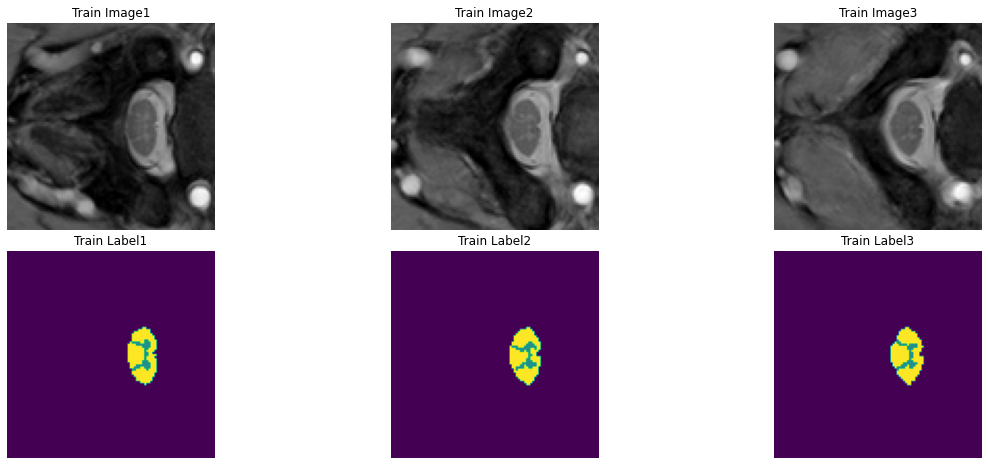

In [ ]:
#visualizing some of the training images and labels
# (re-run to see random pick-ups)
# only maximum of first 5 slices are plotted
train_img_name = os.listdir(train_image_dir)[np.random.randint(0,160)]
train_img = np.array(nib.load(os.path.join(train_image_dir,train_img_name)).dataobj)[:,:,:5]
train_label_name = train_img_name[:train_img_name.find('_0000.nii.gz')]+'.nii.gz'
train_label = np.array(nib.load(os.path.join(train_label_dir,train_label_name)).dataobj)[:,:,:5]

print(train_img.shape,train_label.shape)

max_rows = 2
max_cols = train_img.shape[2]

fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(20,8))
for idx in range(max_cols):
    axes[0, idx].axis("off") 
    axes[0, idx].set_title('Train Image'+str(idx+1))
    axes[0 ,idx].imshow(train_img[:,:,idx], cmap="gray")
for idx in range(max_cols):    
    axes[1, idx].axis("off")
    axes[1, idx].set_title('Train Label'+str(idx+1))
    axes[1, idx].imshow(train_label[:,:,idx])

plt.subplots_adjust(wspace=.1, hspace=.1)
plt.show()

Note: In the label image, yellow color represents white Matter and green-ish color represents grey matter.

Test Data (without Labels)

In [ ]:
# skip this due to non-existent data

#visualizing some of the test images
# (re-run to see random pick-ups)
# only maximum of first 5 slices are plotted

# test_img_name = os.listdir(test_dir)[np.random.randint(0,40)]
# test_img = np.array(nib.load(os.path.join(test_dir,test_img_name)).dataobj)[:,:,:5]

# print(test_img.shape)

# max_cols = test_img.shape[2]
# max_rows = 1

# fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(20,20))
# for idx in range(max_cols):
#     axes[ idx].axis("off") 
#     axes[ idx].set_title('Test Image'+str(idx))
#     axes[ idx].imshow(test_img[:,:,idx], cmap="gray")
    
    
# plt.subplots_adjust(wspace=.1, hspace=.1)
# plt.show()

### 7.6.1 Sighting of Data and Lables with MITK-Workbench
At this stage it is also useful to analyze the imaging data with MITK-Workbench.
To do this, download the training data to your own local machine and visualize them via drag and drop into MITK-Workbench

This is already explained in part 6.3.4

## 7.7 Training nnU-Net

nnU-Net stores a checkpoint every 50 epochs. If you need to continue a previous training, just add a -c to the training command.

Generic Training Commands:

```nnUNet_train CONFIGURATION TRAINER_CLASS_NAME TASK_NAME_OR_ID FOLD (additional options)```

For 2D:  ```nnUNet_train 2d nnUNetTrainerV2 TaskXXX_MYTASK FOLD```

For 3D Full resolution: ```nnUNet_train 3d_fullres nnUNetTrainerV2 TaskXXX_MYTASK FOLD```

For Cascaded 3D:

First Run lowres: ```nnUNet_train 3d_lowres nnUNetTrainerV2 TaskXXX_MYTASK FOLD```

Then Run fullres: ```nnUNet_train 3d_cascade_fullres nnUNetTrainerV2CascadeFullRes TaskXXX_MYTASK FOLD```

In [ ]:
# train nnU-Net with 3d_fullres model on the SCGM Task with Fold 0
# Again Training may take a while therefore it is advised to interrupt the training after some time (e.g. after 1 epoch)
# 1 Epoch takes approximately: over 30 minutes on GoogleColab -- you need GoogleColab Pro to run this completely
!nnUNet_train 3d_fullres nnUNetTrainerV2 501 0 



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

###############################################
I am running the following nnUNet: 3d_fullres
My trainer class is:  <class 'nnunet.training.network_training.nnUNetTrainerV2.nnUNetTrainerV2'>
For that I will be using the following configuration:
num_classes:  2
modalities:  {0: 'MRI'}
use_mask_for_norm OrderedDict([(0, False)])
keep_only_largest_region None
min_region_size_per_class None
min_size_per_class None
normalization_schemes OrderedDict([(0, 'nonCT')])
stages...

stage:  0
{'batch_size': 2, 'num_pool_per_axis': [2, 6, 6], 'patch_size': array([ 16, 320, 320]), 'median_patient_size_in_voxels': array([ 21, 401, 401]), 'current

## 7.8 Inference Code

nnUNet_find_best_configuration will print inference commands you need to use. The easiest way to run inference is to simply use these commands.

For each of the desired configurations, run:

```nnUNet_predict -i INPUT_FOLDER -o OUTPUT_FOLDER -t TASK_NAME_OR_ID -m CONFIGURATION --save_npz```

Only specify ```--save_npz``` if you intend to use ensembling. ```--save_npz``` will make the command save the softmax probabilities alongside of the predicted segmentation masks requiring a lot of disk space.

Note: Please select a separate OUTPUT_FOLDER for each configuration!

In [ ]:
# Optional
!nnUNet_find_best_configuration -t 501

In [ ]:
result_dir = os.path.join(os.getenv("RESULTS_FOLDER"),'nnUNet_Prediction_Results',task_name)
make_if_dont_exist(result_dir)

team_name = 'awesome_nnU-Net_team' #make sure to change for your own team name

**Note**: 

If you interrupted the training go the given fold inside of the RESULTS_FOLDER for the task and:
1. rename **model_best.model.pkl** to **model_final_checkpoint.model.pkl** 
2. rename **model_best.model** to **model_final_checkpoint.model** 

In [ ]:
#location where you want save your results, will be created if dont exist
!nnUNet_predict -i '${nnUNet_raw_data_base}/nnUNet_raw_data/Task101_SCGM/imagesTs' -o '${RESULTS_FOLDER}/Task101_SCGM/predTs' -t 501 -tr nnUNetTrainerV2 -m 3d_fullres #--num_threads_preprocessing 1

If you wish to run ensembling, you can ensemble the predictions from several configurations with the following command:

```nnUNet_ensemble -f FOLDER1 FOLDER2 ... -o OUTPUT_FOLDER -pp POSTPROCESSING_FILE```

## 7.9 Visualization of Predictions
Similar to the dataset visualization we would encourage you to do this with MITIK-Workbench.

Here is a quick visualization with python.

In [ ]:
#visualizing the predicted results
# (re-run to see random pick-ups)
# only maximum of first 5 slices are plotted

test_img_name = os.listdir(test_dir)[np.random.randint(0,40)]
test_img = np.array(nib.load(os.path.join(test_dir,test_img_name)).dataobj)[:,:,:5]
predicted_img_name = test_img_name[:test_img_name.find('_0000.nii.gz')]+'.nii.gz'
predicted_label = np.array(nib.load(os.path.join(result_dir,predicted_img_name)).dataobj)[:,:,:5]
print('Test Image Shape: ',test_img.shape)
print("Predicted Image Shape:",predicted_label.shape)

max_rows = 2
max_cols = test_img.shape[2]

fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(20,8))
for idx in range(max_cols):
    axes[0, idx].axis("off") 
    axes[0, idx].set_title('Test Image'+str(idx+1))
    axes[0 ,idx].imshow(test_img[:,:,idx], cmap="gray")
for idx in range(max_cols):    
    axes[1, idx].axis("off")
    axes[1, idx].set_title('Predicted Label'+str(idx+1))
    axes[1, idx].imshow(predicted_label[:,:,idx])
    
plt.subplots_adjust(wspace=.1, hspace=.1)
plt.show()

# 8. Final Words
The Workshop and this tutorial is now finished.

If you made it this far, we hope you enjoyed the ride.

To further expand your knowledge about nnU-Net you may now want to tackle one of the following tasks:
- Use Pretrained nnU-Net models for other Decathlon Tasks.
- Look up a Dataset of your own and implement a new Task for nnU-Net.
- Download the nnU-Net repository to your local machine and familiarize yourself with the codebase.

Please feel free to share it with people who you believe might benefit from it.

# Acknowledgements
Many thanks to the people who tested this tutorial and gave feedback:
- Stephen Schaumann
- Robin Peretzke
- Santhosh P.
- Jonas Bohn
- Sebastian Ziegler
- Yannick Kirchhoff
- Tobias Norajitra
- Lars Krämer
- Peter Full
- Sebastian Zieger
- Lukas Klein
- Tassilo Wald
- Stefan Dinkelacker
- Fabian Isensee
- Paul Jäger